### The components of a linear model

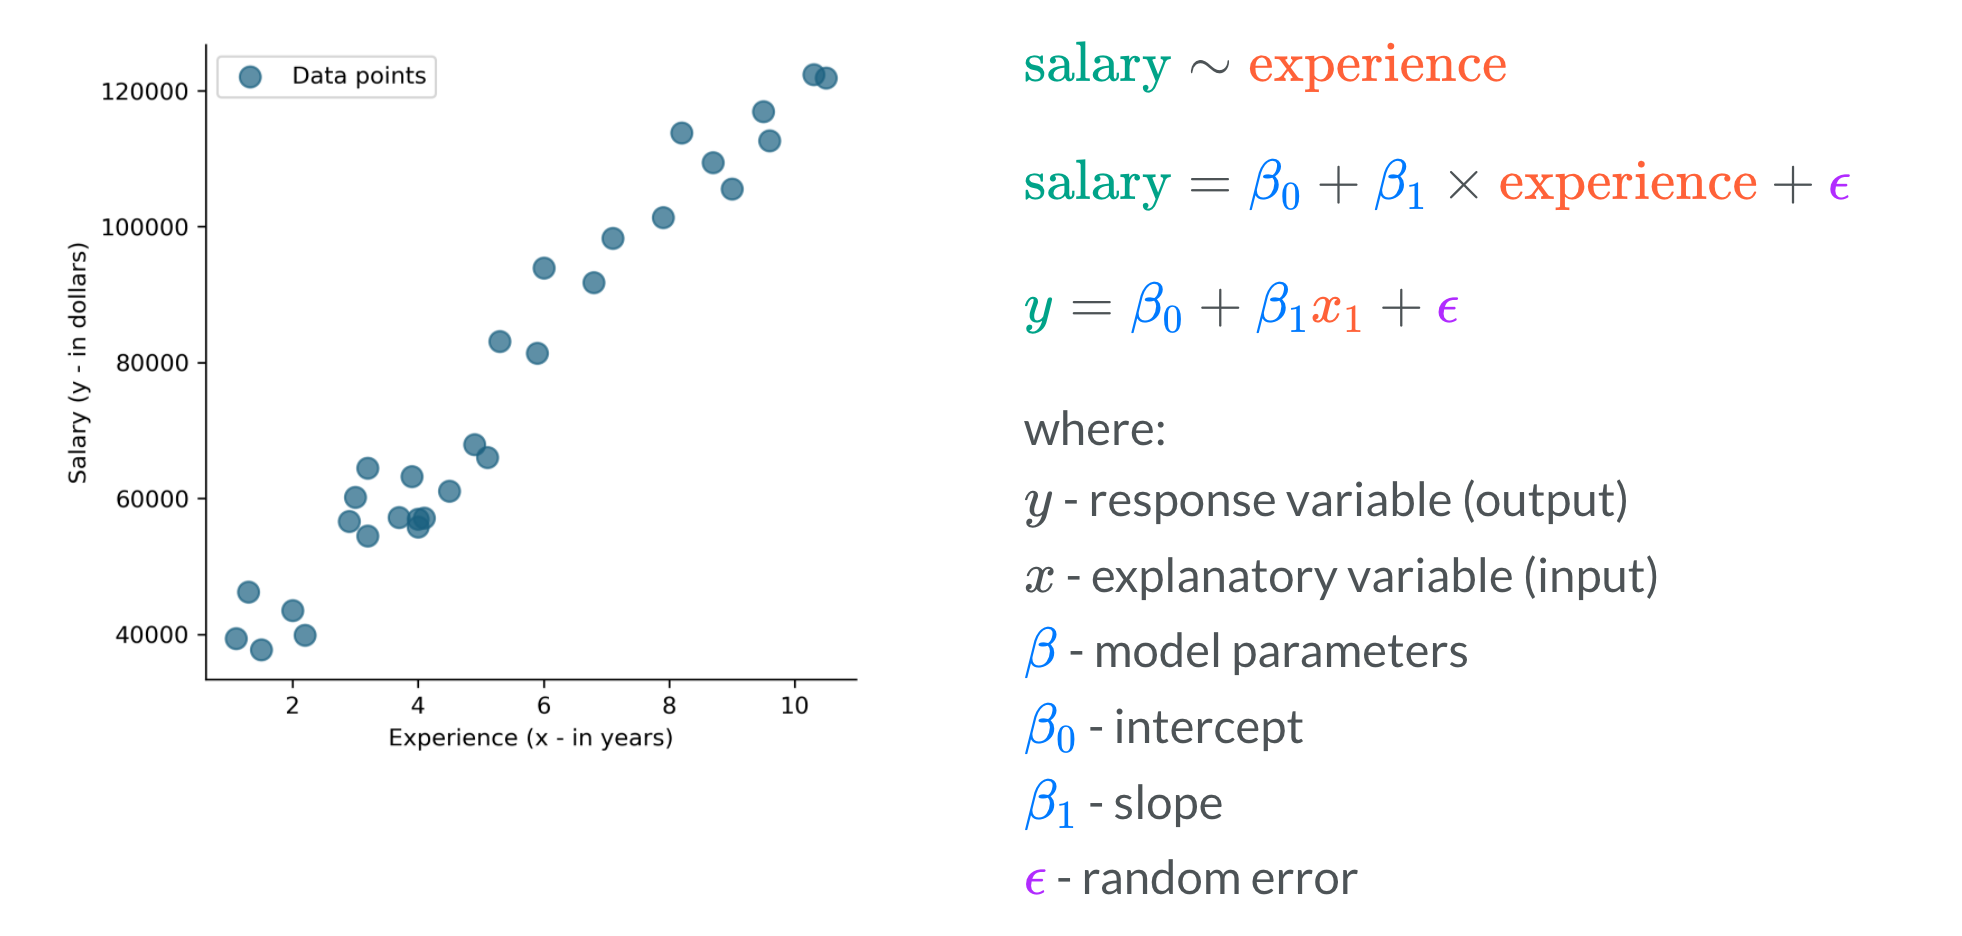

In [10]:
from IPython.display import Image
Image('linearcomponents.png', width=800, height=800)

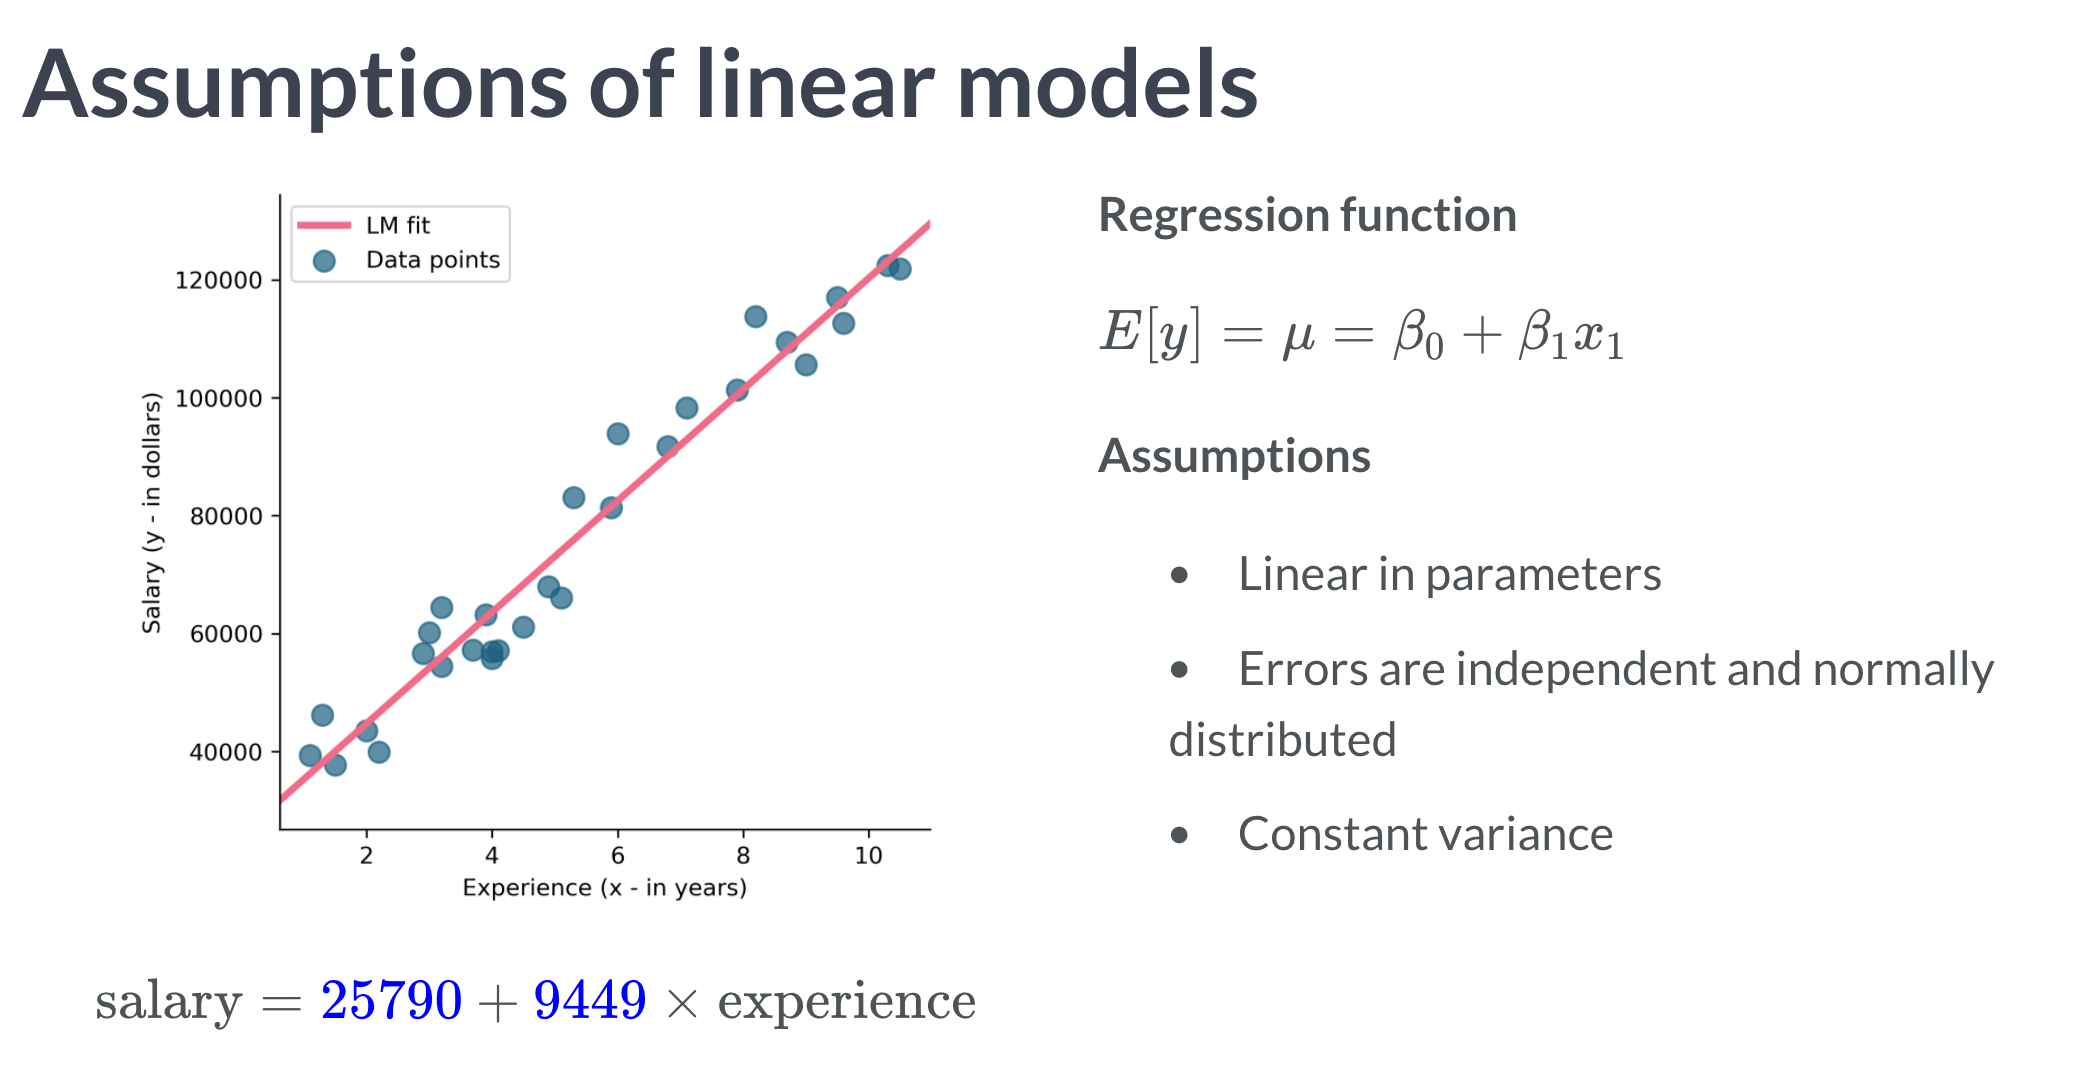

In [11]:
Image('linearassumptions.png', width=800, height=800)

We need GLMs when dealing with non-continuous data [discrete]

Ie moving away from linear regression to logistic regression to deal with binary or count data (poisson)

The response variable (y) will be bounded by 0 and 1

The Binomial GLM provides the means to compute estimated probabilities in the range of the response variable for binary data, unlike linear models which give out of range estimations.

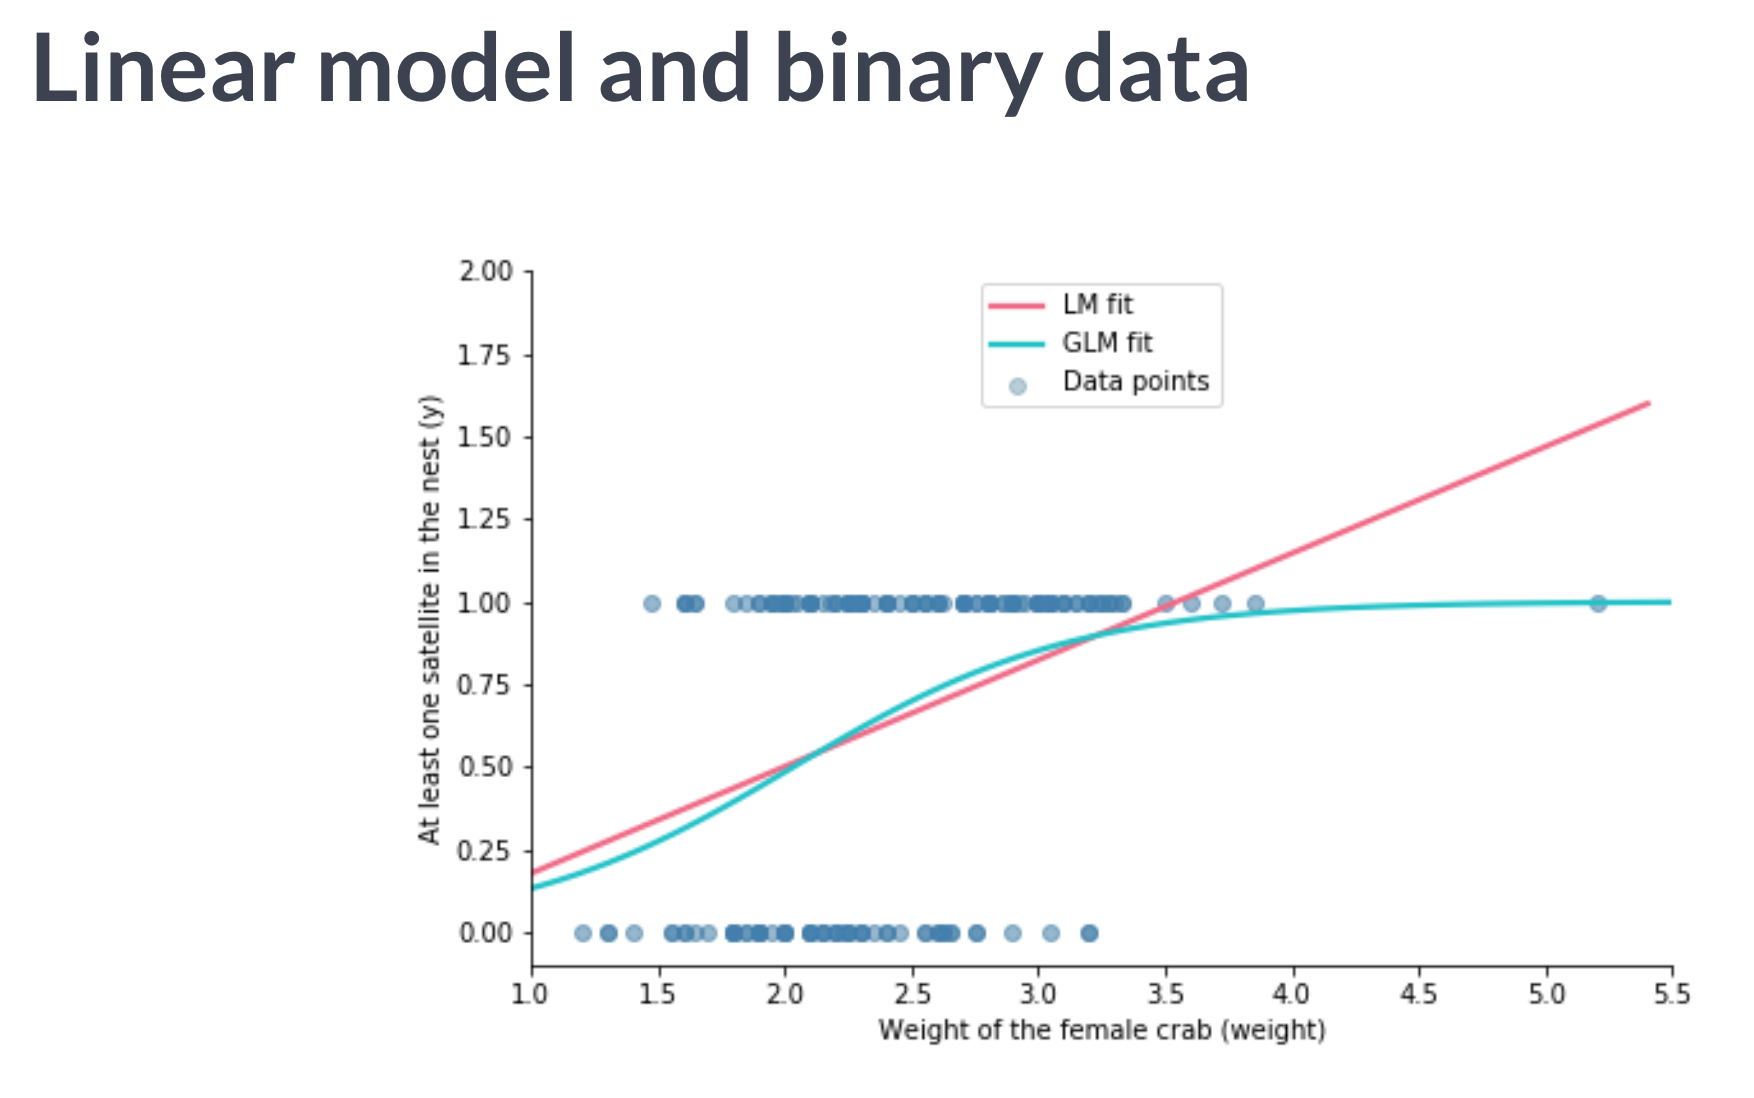

In [12]:
Image('linevglm.png', width=600, height=600)

In [13]:
# glms are imported just as linear models from stats model
# with one added argument "family" 
# this denotes the probability distribution of the response variable

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

salary = pd.read_csv('salary.csv')

model_lm = ols(formula = 'Salary ~ Experience',
               data = salary).fit()

model_glm = glm(formula = 'Salary ~ Experience',
                data = salary,
                family = sm.families.Gaussian()).fit()

print(f'Linear model parameters:\n{model_lm.params}\n\nGLM parameters\n{model_glm.params}')

Linear model parameters:
Intercept     25792.200199
Experience     9449.962321
dtype: float64

GLM parameters
Intercept     25792.200199
Experience     9449.962321
dtype: float64


**Notice**, they give the same values, because the GLM is *general*, we have specified the assumption that we are using a Gaussian distribution

GLMs provide a unified framework for modeling data originating from the exponential family densities, which include Gaussian, Binomial, Poisson and more

Three components of GLMs
1. random component - defines the response variable *y* and its probability distribution
<br> important assumption; obversations y<sub>1</sub> to y<sub>n</sub> are independent
2. systematic component - defines which explanatory variables to include in the model
<br> we include *p* variables
<br> the model allows for interaction effects between variables
<br> and curvilinear effects
3. link function - connects the random and systematic component, it is the function of the expected value of the response variable which enables linearity in the parameters
<br> it is the link function that generalises the linear model
<br> the link function transforms the exepected value of y, not y itself
<br> it enables linear combinations
<br> the choice of the link function is separate to the choice of the random component

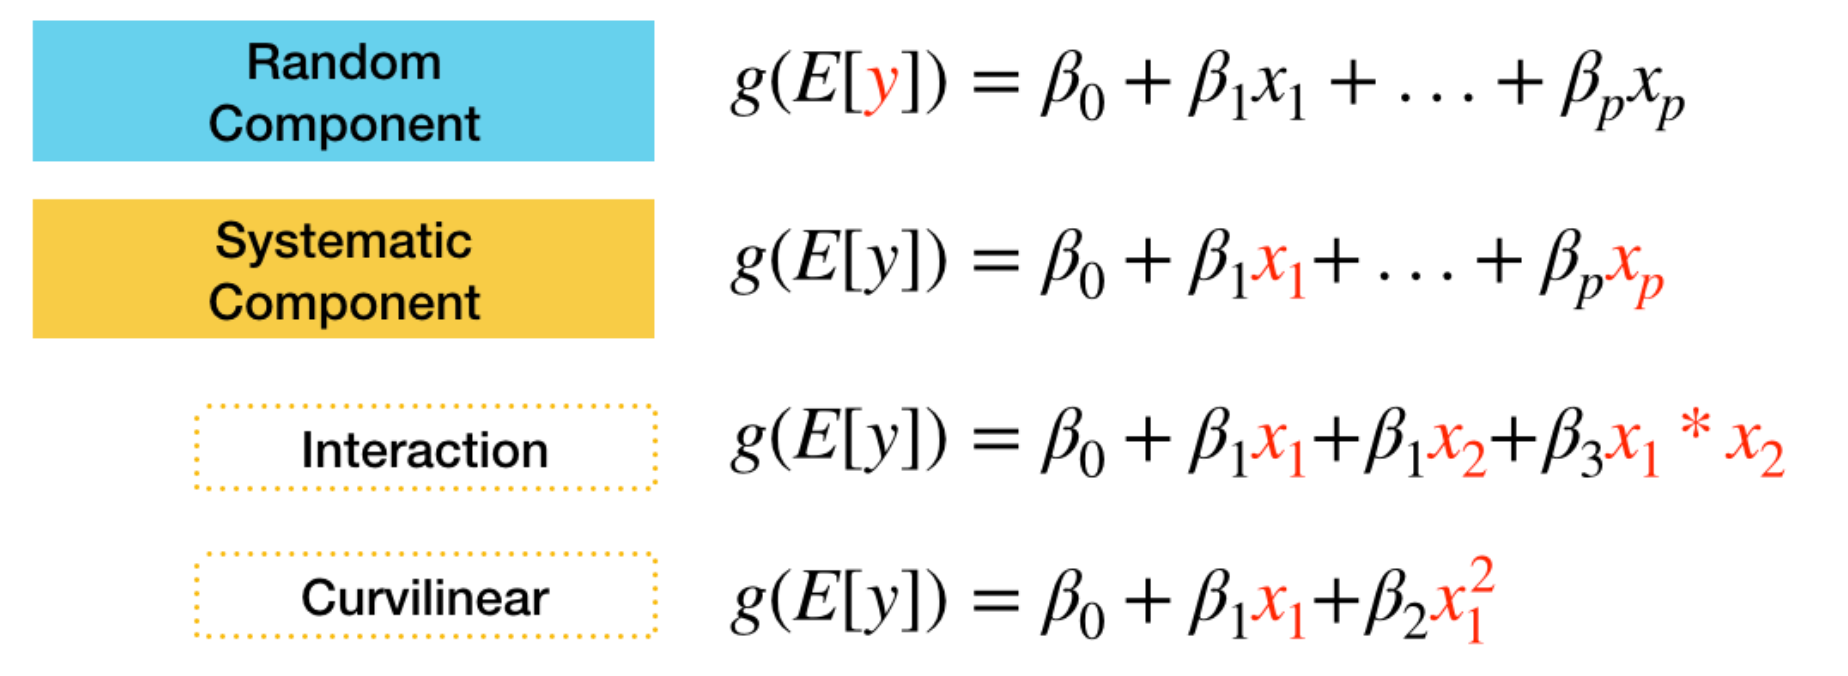

In [14]:
Image('glmcomps.png', width=600, height=600)

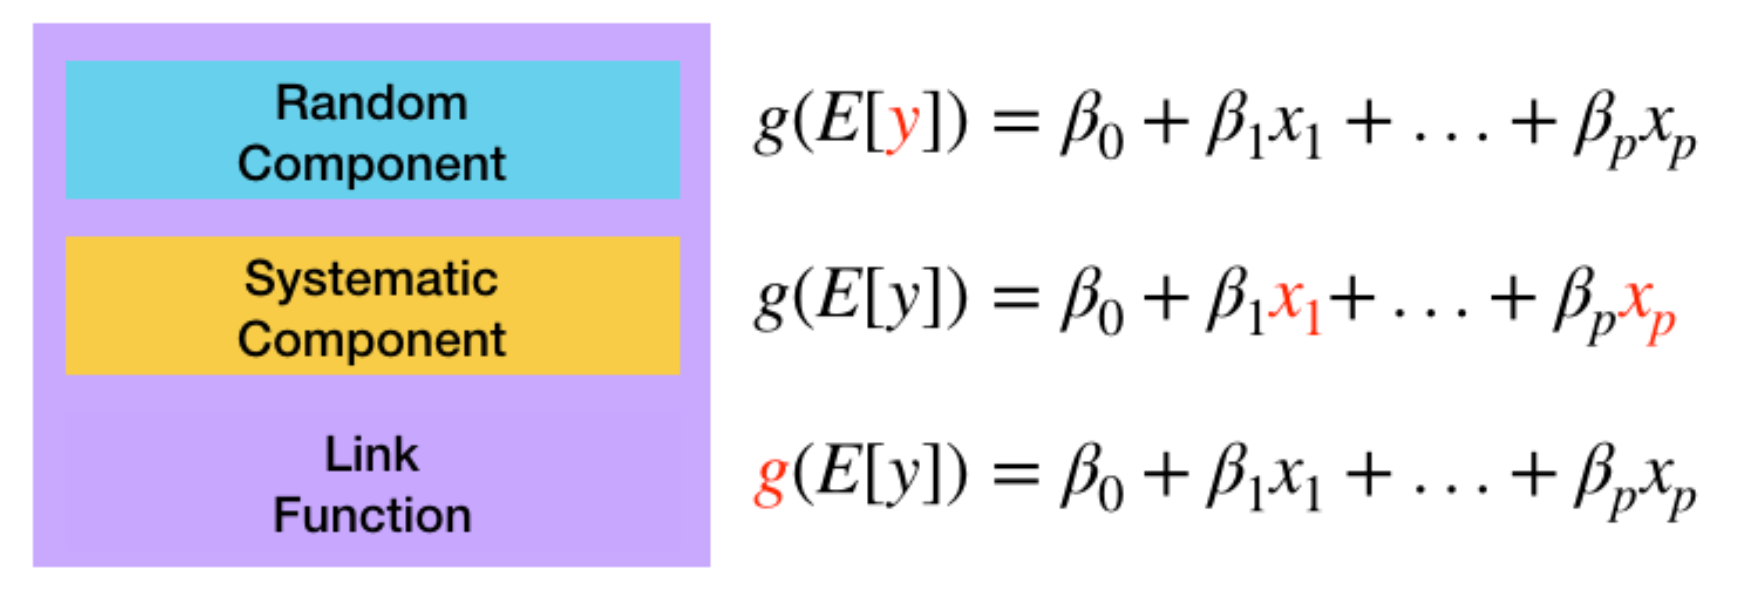

In [15]:
Image('glmcomps2.png', width=600, height=600)

For example, in a continuous normal distribution, the link function is the identity.

The link function equals mu or the mean of the responses.

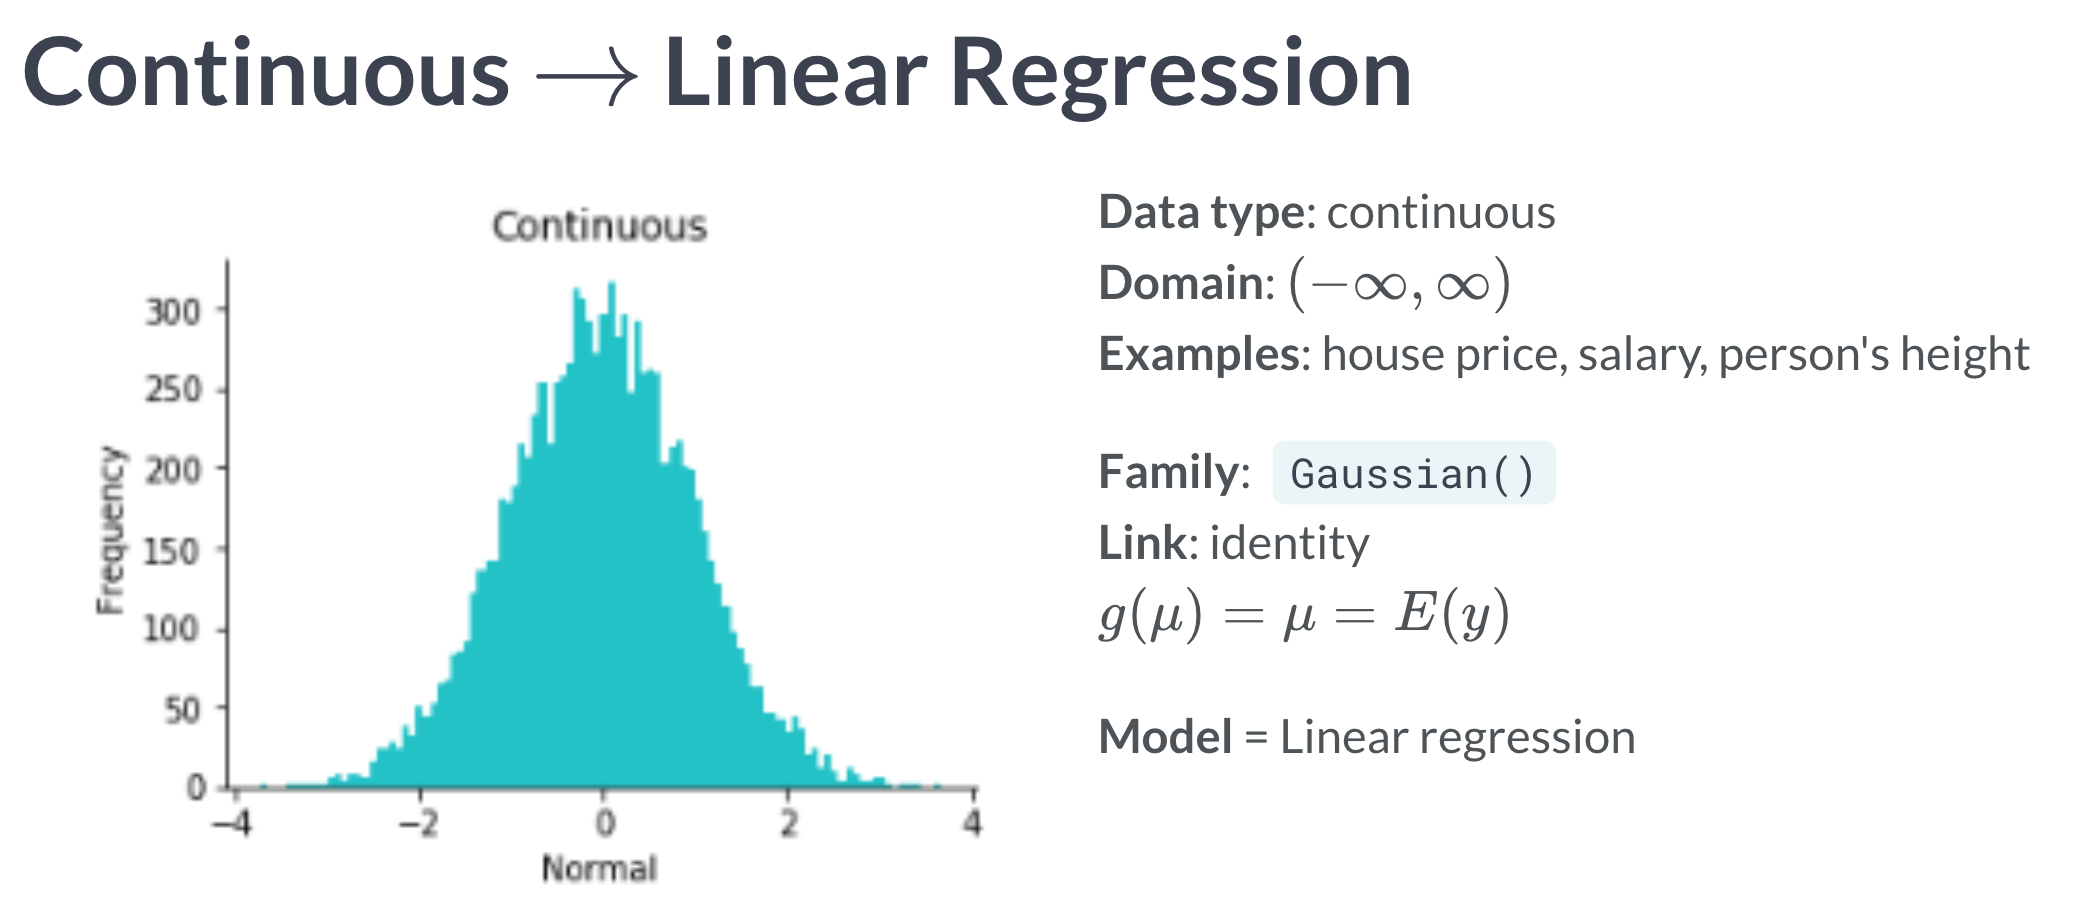

In [16]:
Image('lrexample.png', width=600, height=600)

In binary data, when using logistic regression, the link function will be *logit*

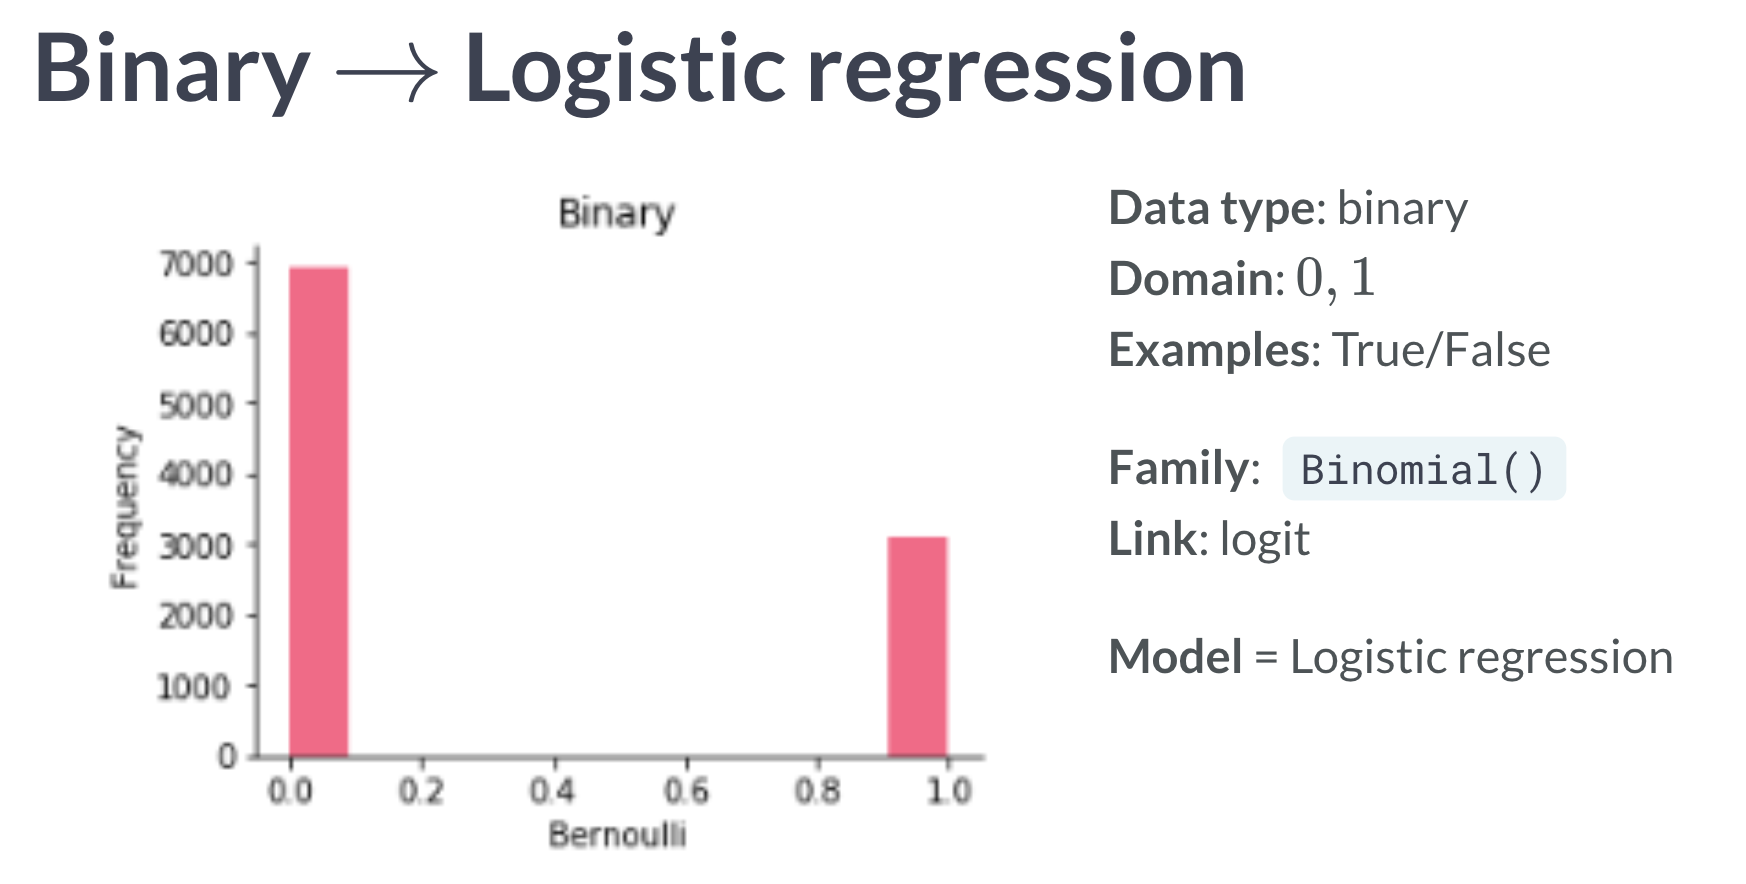

In [17]:
Image('binaryexample.png', width=600, height=600)

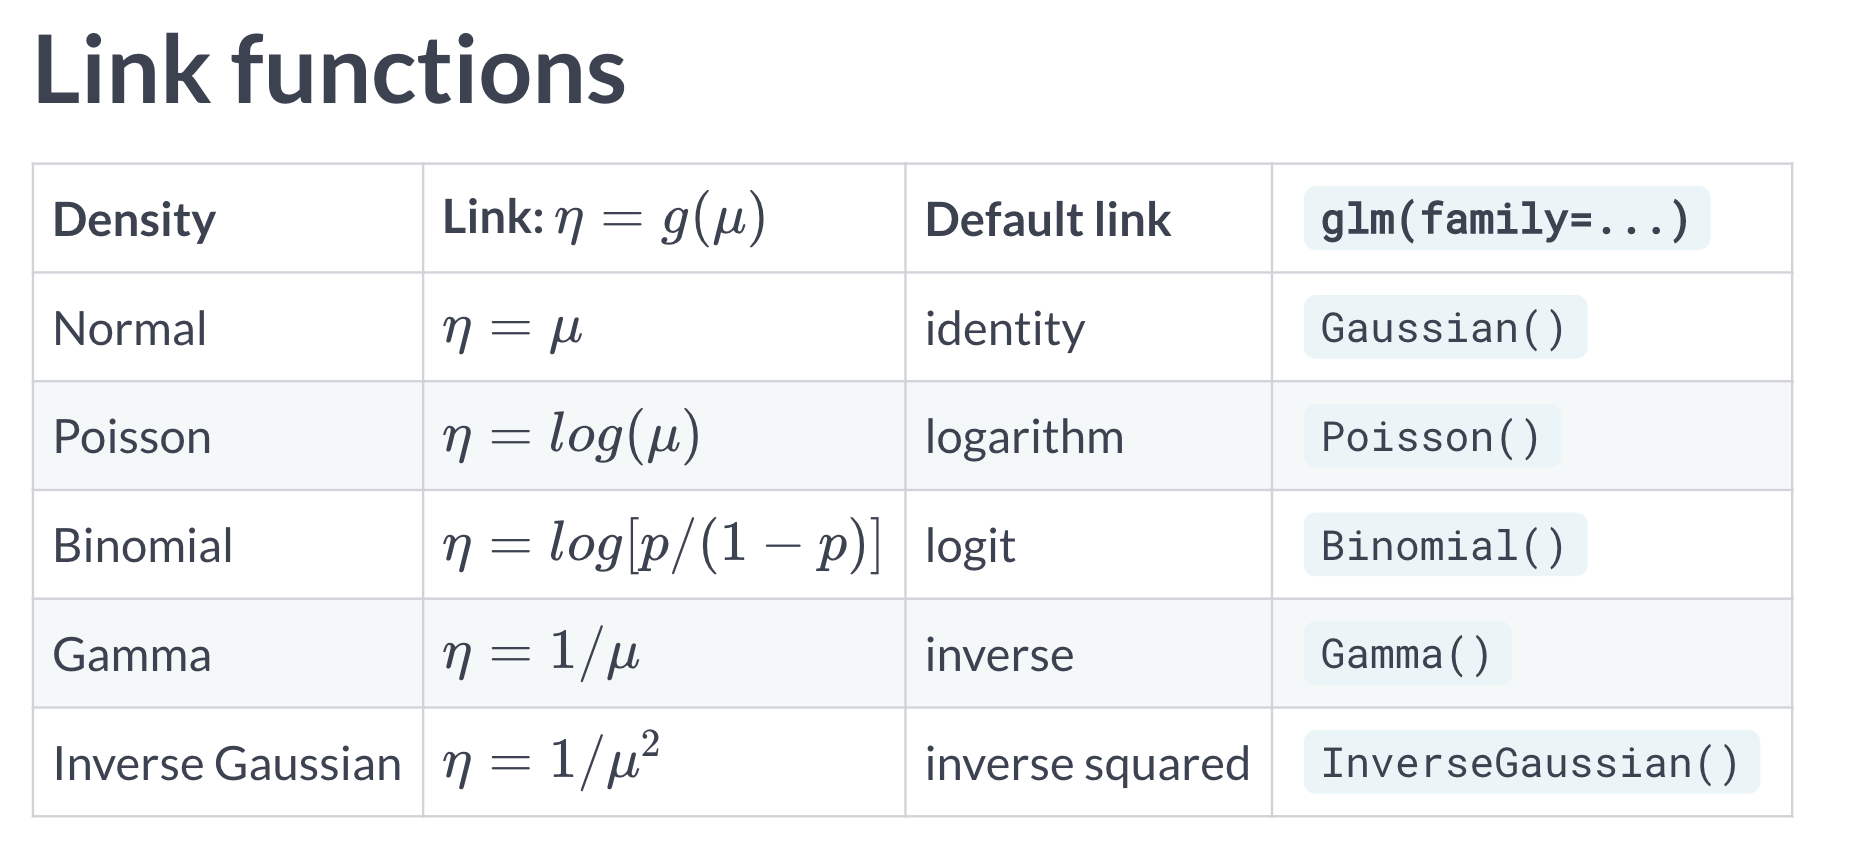

In [18]:
Image('linkfuncs.png', width=800, height=800)

**Example**

Consider a study in which you are trying to predict the number of bike crossings over the Brooklyn bridge in New York City given daily temperature.

In [19]:
import matplotlib.pyplot as plt

bike = pd.read_csv('bike.csv')

fig, ax = plt.subplots()
ax.plot(bike.Avg_Temp, bike.Brooklyn_B, linestyle=' ', marker='o')
ax.set_xlabel('average temperature')
ax.set_ylabel('Brooklyn bridge bike crossings')
ax.set_title('Appears to be Poisson distribution')
plt.show()

<Figure size 640x480 with 1 Axes>

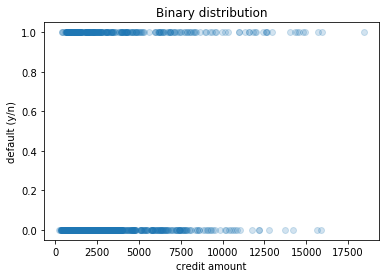

In [20]:
default = pd.read_csv('default.csv')

fig, ax = plt.subplots()
ax.plot(default.Credit_Amount, default.Default, linestyle=' ', marker='o', alpha = 0.2)
ax.set_xlabel('credit amount')
ax.set_ylabel('default (y/n)')
ax.set_title('Binary distribution')
plt.show()

In [21]:
crab = pd.read_csv('crab.csv')

# Define model formula
formula = 'y ~ width'

# Define and fit a linear regression model
model_lm = glm(formula = formula, 
               data = crab, 
               family = sm.families.Gaussian()
              ).fit()

# Define and fit a logistic regression model
model_glm = glm(formula = formula, 
                data = crab, 
                family = sm.families.Binomial()
               ).fit()

print(f'Linear model parameters:\n{model_lm.summary()}\n\nGLM parameters\n{model_glm.summary()}')

Linear model parameters:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.19515
Method:                          IRLS   Log-Likelihood:                -103.13
Date:                Wed, 15 Apr 2020   Deviance:                       33.371
Time:                        15:10:33   Pearson chi2:                     33.4
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7655      

**Fitting a model**

There are two ways to describe the model (1) formulas (2) arrays

In R formulas is more typical

*formula based*

`from statsmodels.formula.api import glm`

`model = glm(formula, data, family)`

*array based*

`import statsmodels.api as sm`

`X = sm.add_constant(X)`
`model = sm.glm(, X, family)`

the formula is the heart of the model

`response ~ explanatory variable(s)`

each variable can be separated by a `+` plus

formula = `y ~ x1 + x2`

Categroical variables: `C(x1)`

Remove the intercept: `-1`

Interaction between x1 and x2: `x1:x2` 

Interaction between x1 and x2 and add individual variables: `x1*x2`

Transform the variables directly in the formula, eg: `np.log(x1)`

In [22]:
wells = pd.read_csv('wells.csv')

# switch: 1 if the change of the current well occurred; 0 otherwise
# arsenic: The level of arsenic contamination in the well
# distance: Distance to the closest known safe well
# education: Years of education of the head of the household

# Define the formula the the logistic model
model_formula = 'switch ~ distance100'

# Define the correct probability distribution and the link function of the response variable
link_function = sm.families.links.logit
model_family = sm.families.Binomial(link = link_function)

# Fit the model
wells_fit = glm(formula = model_formula, 
                 data = wells, 
                 family = model_family).fit()

print(wells_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.6
Date:                Wed, 15 Apr 2020   Deviance:                       4061.3
Time:                        15:10:33   Pearson chi2:                 3.01e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6108      0.060     10.104      

<ipython-input-22-f42b716c29de>:13: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  model_family = sm.families.Binomial(link = link_function)


In [23]:
intercept, slope = wells_fit.params
confidence_intervals = wells_fit.conf_int()

print(f'Intercept = {round(intercept,2)}\nSlope = {round(slope,2)}\n\n95% Confidence Intervals\n{confidence_intervals}')

Intercept = 0.61
Slope = -0.63

95% Confidence Intervals
                    0         1
Intercept    0.492327  0.729297
distance100 -0.820345 -0.437816


## Logistic regression - modeling binary data

Two class response -> 0 or 1

Ungrouped data is represents a single event. A Bernoulli distribution, which is a special case of a Binomial distribution where n = 1

Grouped data, represents multiple events. The number of success in a given *n* number of trials

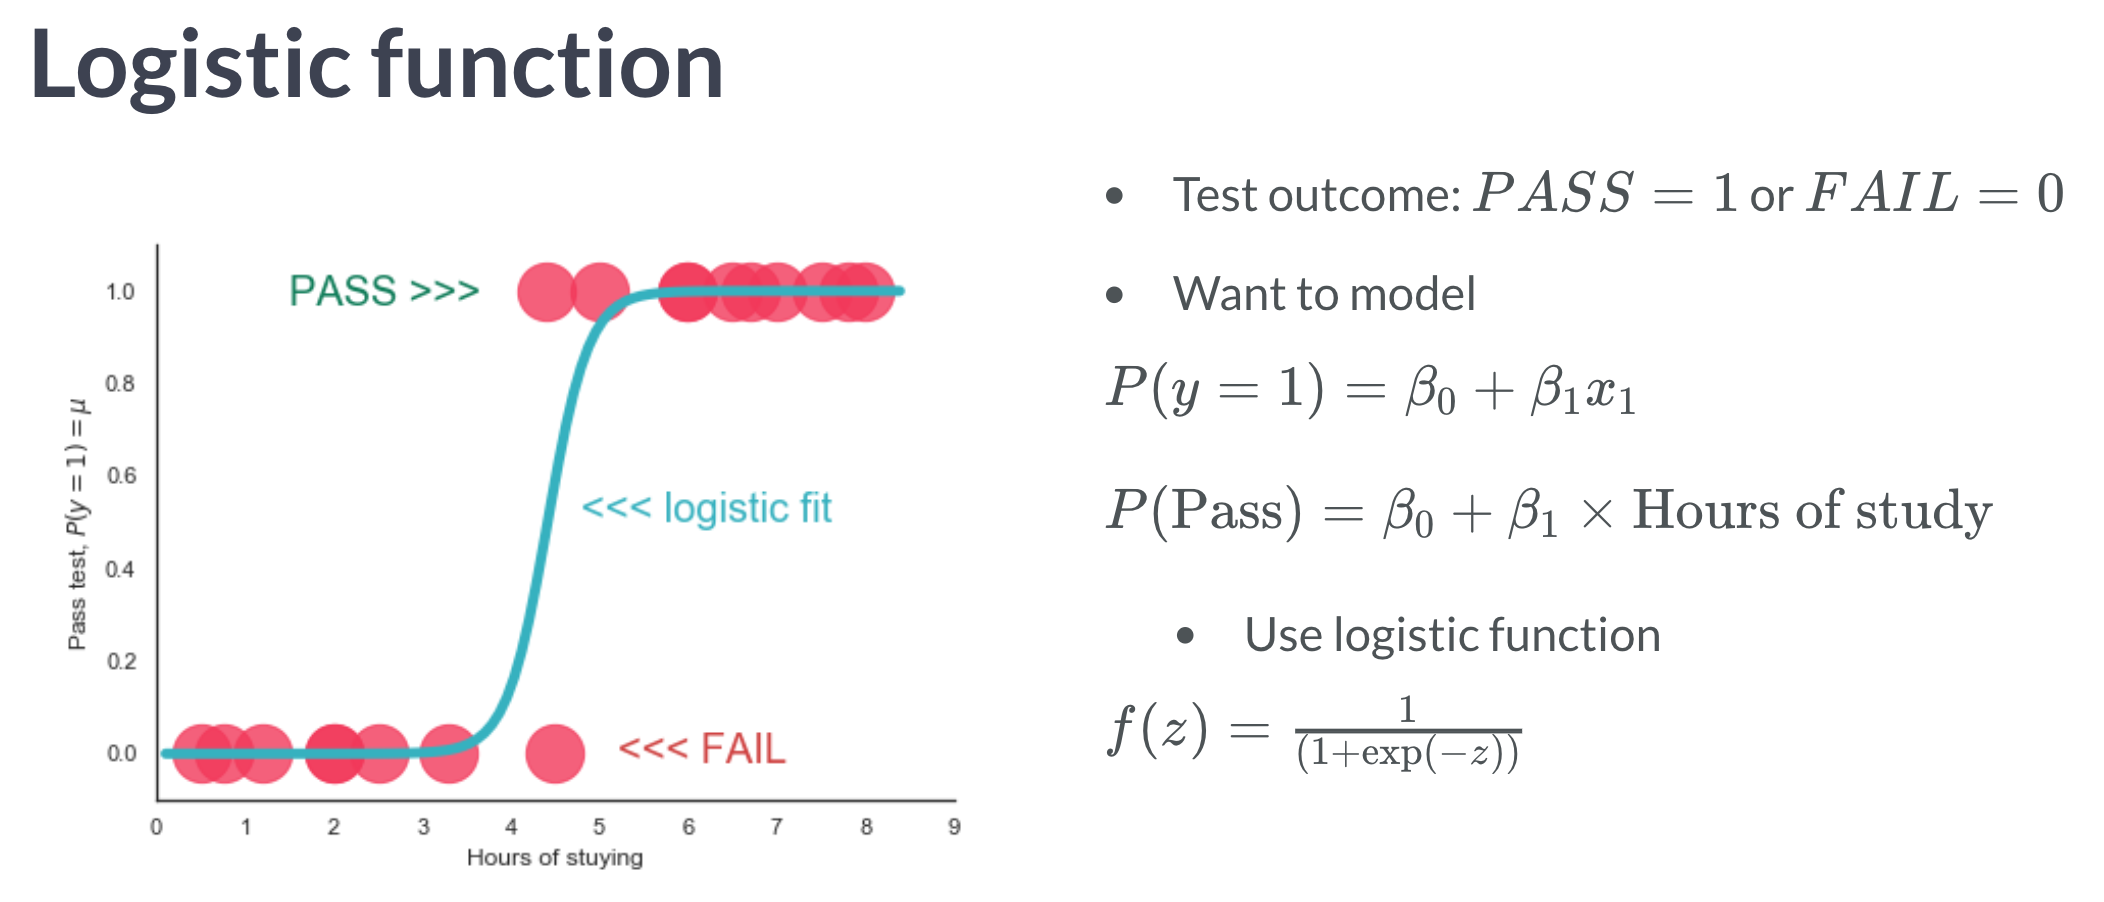

In [24]:
Image('studyhours.png', width=600, height=600)

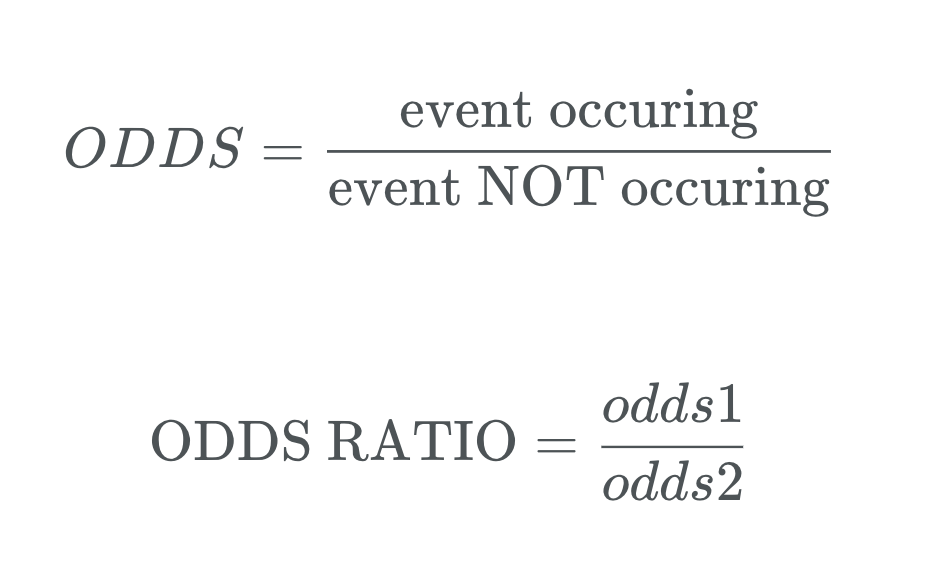

In [25]:
Image('odds.png', width=600, height=600)

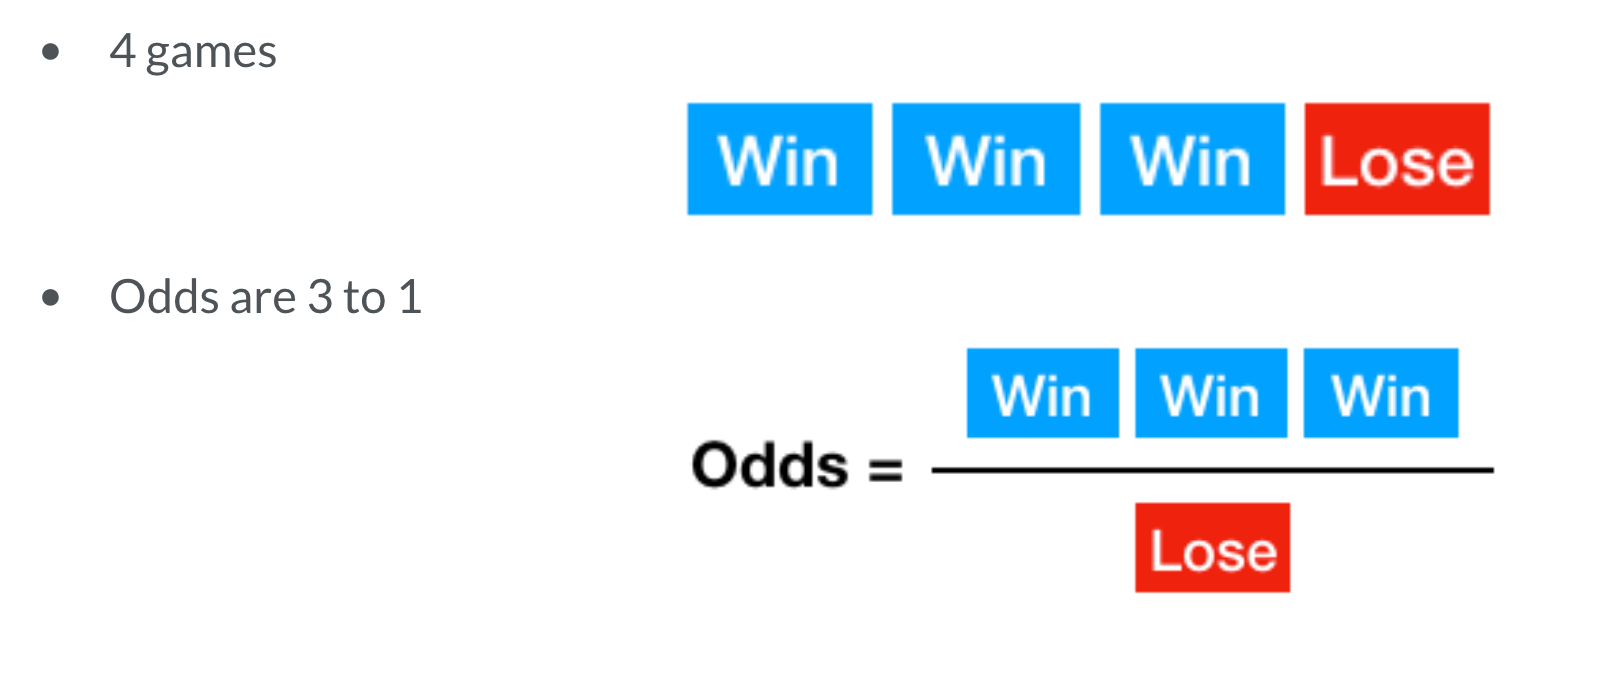

In [26]:
Image('oddsexample.png', width=600, height=600)

Odds are not probabilties, but can be calculated from one another.

Odds = probability / (1 - probability) *equivalent to* event occuring / event not occuring

Probability = odds / (1 - odds)

**Logistic regression**

The logistic function (step 2 below) applies the necessary bounds required for our binary data (the first is unbounded, ie continuous)

Mu is the estimated probability, 1 - Mu is the porbability of the event not occuring (step 3)

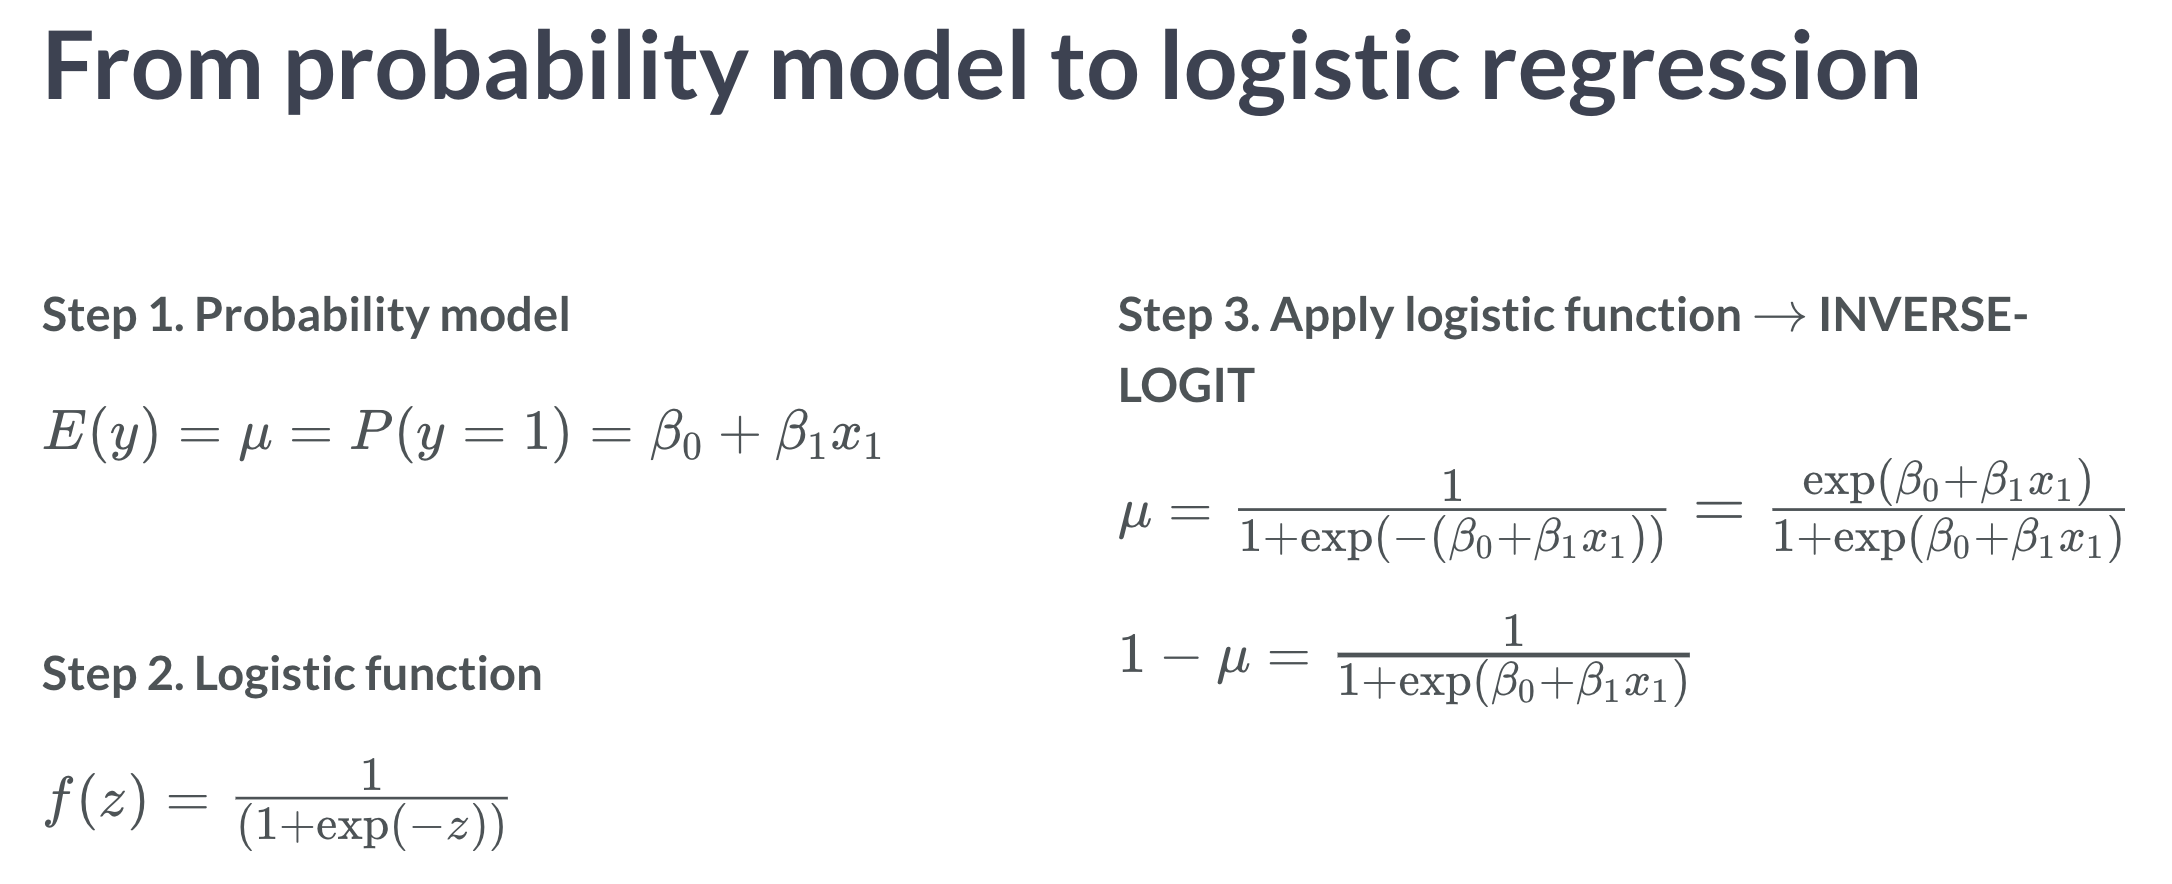

In [27]:
Image('logsteps.png', width=600, height=600)

Finally, we compute the odds in term of probability with log transformation

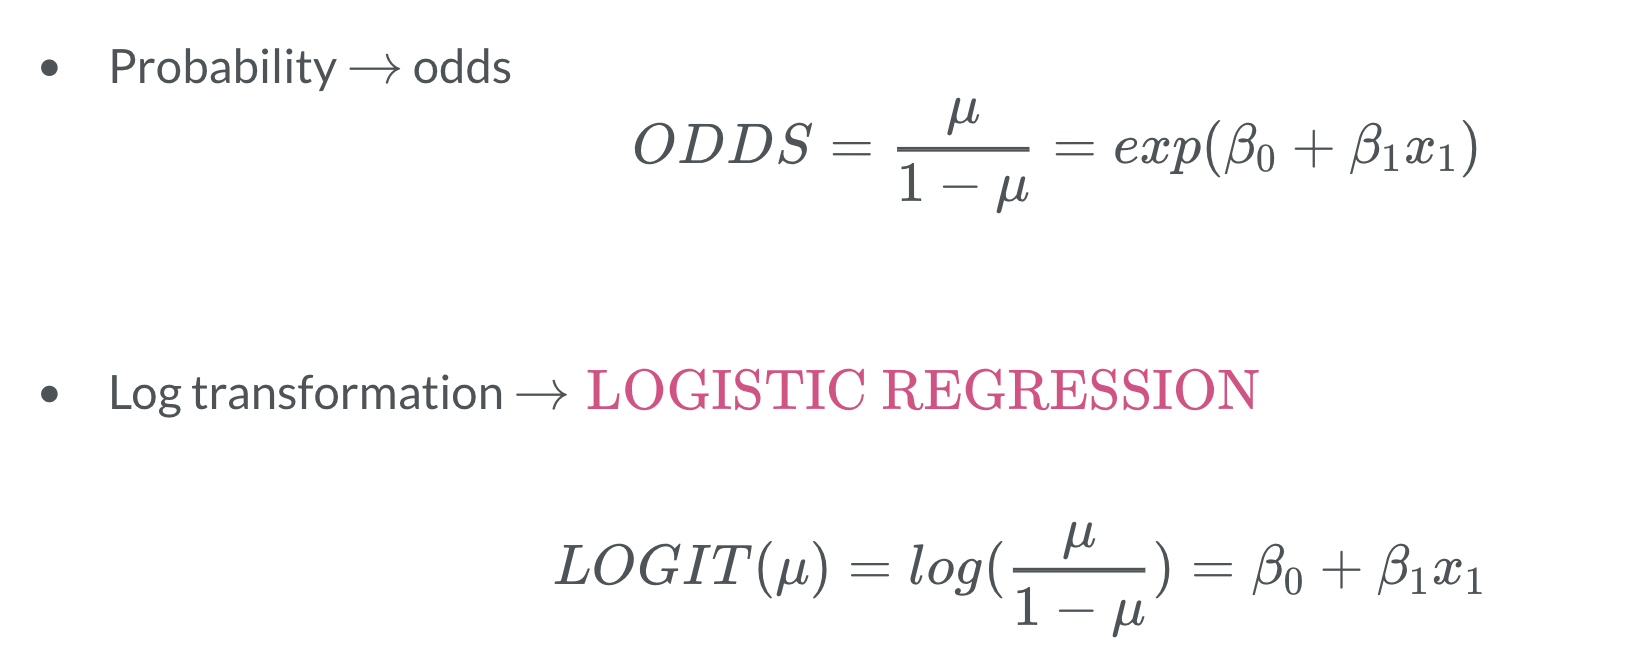

In [28]:
Image('logsteps2.png', width=600, height=600)

In [29]:
# data from the study on the contamination of ground water with arsenic in Bangladesh 
# where you want to model the probability of switching the current well 
# given the level of arsenic present in the well.


import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit logistic regression model
model_GLM = glm(formula = 'switch ~ arsenic',
                data = wells,
                family = sm.families.Binomial()).fit() 

# Print model summary
print(model_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1997.3
Date:                Wed, 15 Apr 2020   Deviance:                       3994.6
Time:                        15:10:33   Pearson chi2:                 3.03e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3058      0.070     -4.340      0.0

**Intepreting conefficients**

The coefficient beta $\beta$ determines the rate of increase or decrease of the sigmoid curve

It is challenging to interpret coefficiencts of logistic regression due to nonlinearity

In logisitc regression, coefficiecnts are expressed in terms of the log odds

We use exponentiation to go from log odds to odd - ie e<sup>x</sup> 
<br>where x is our beta

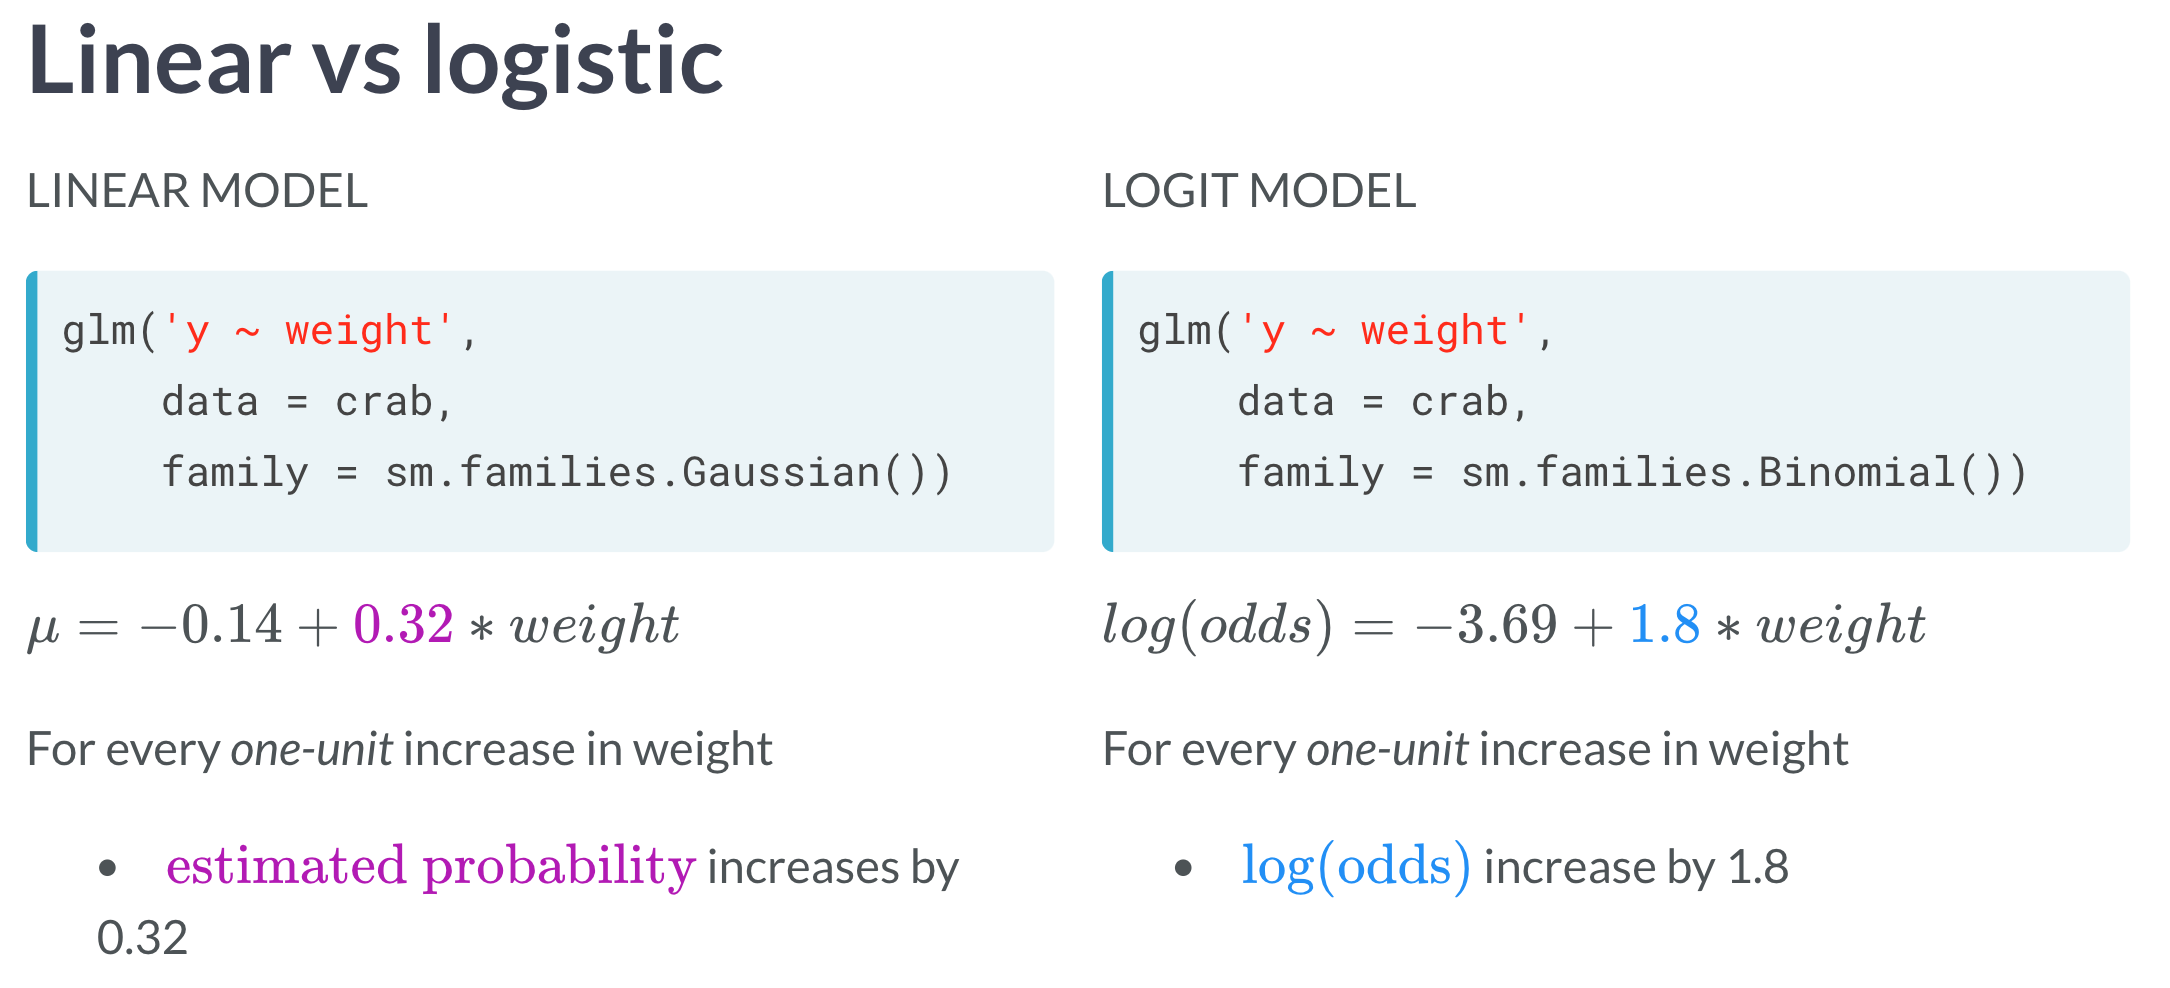

In [30]:
Image('linearvlogistic.png', width=600, height=600)

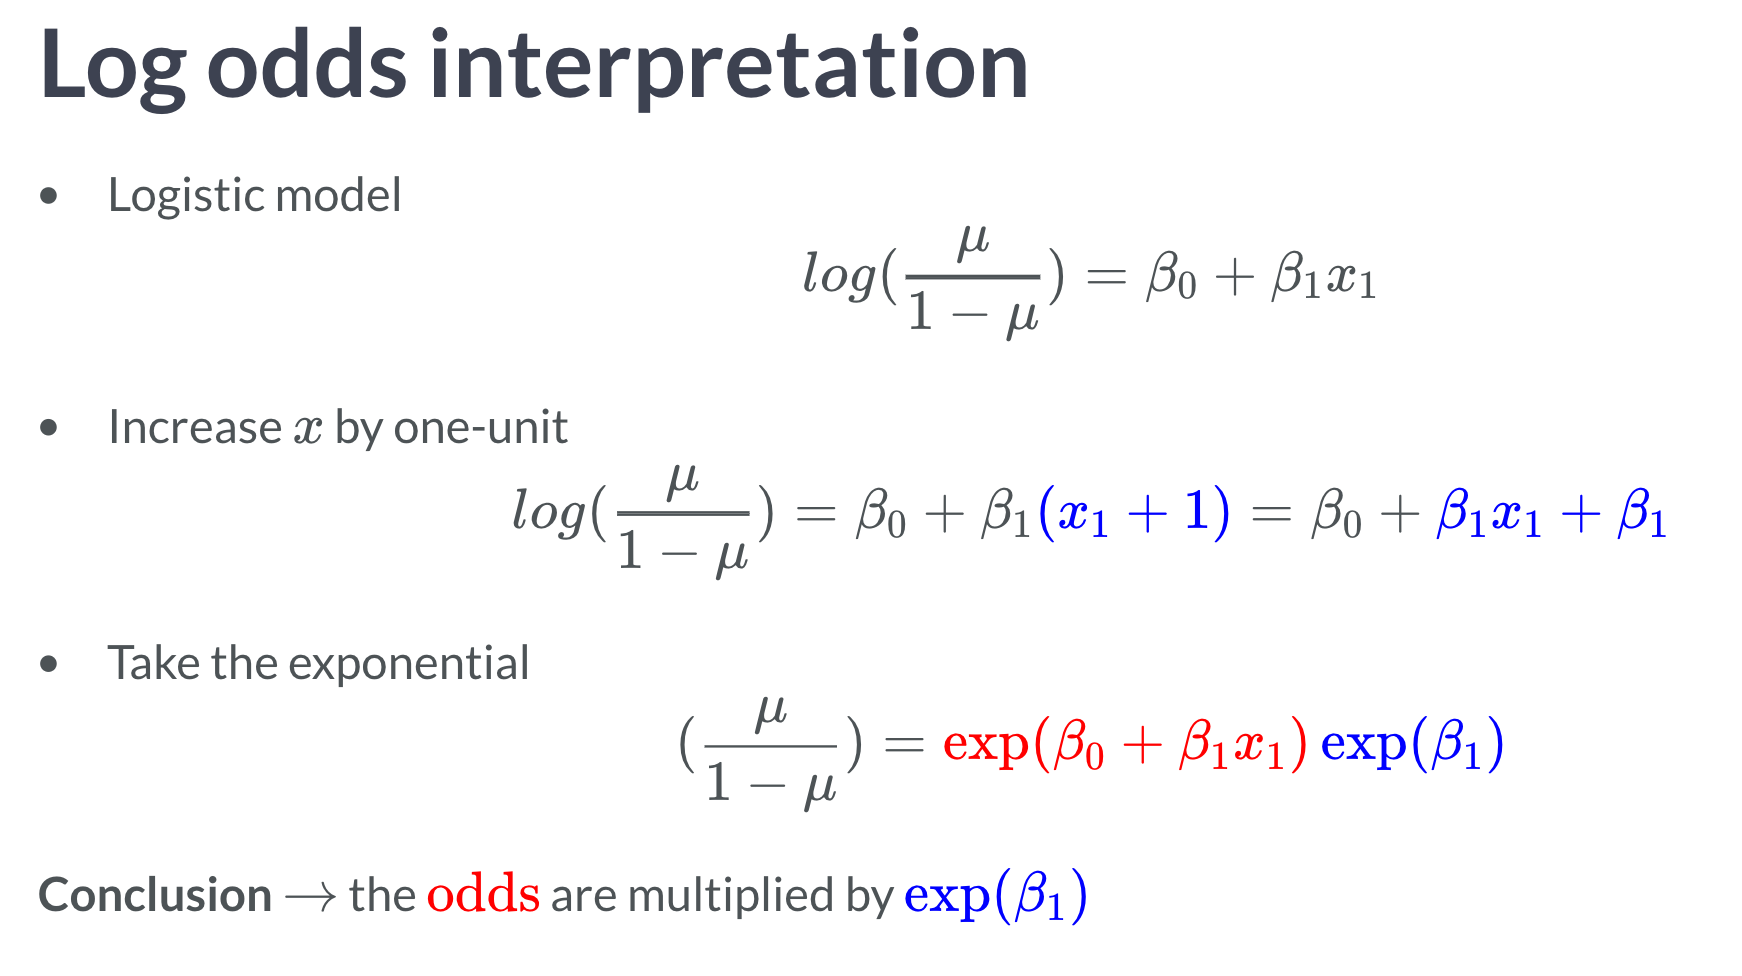

In [31]:
Image('logodds.png', width=600, height=600)

The curve is nonlinear so the rate of change in probability per 1-unit increase depends on the x value

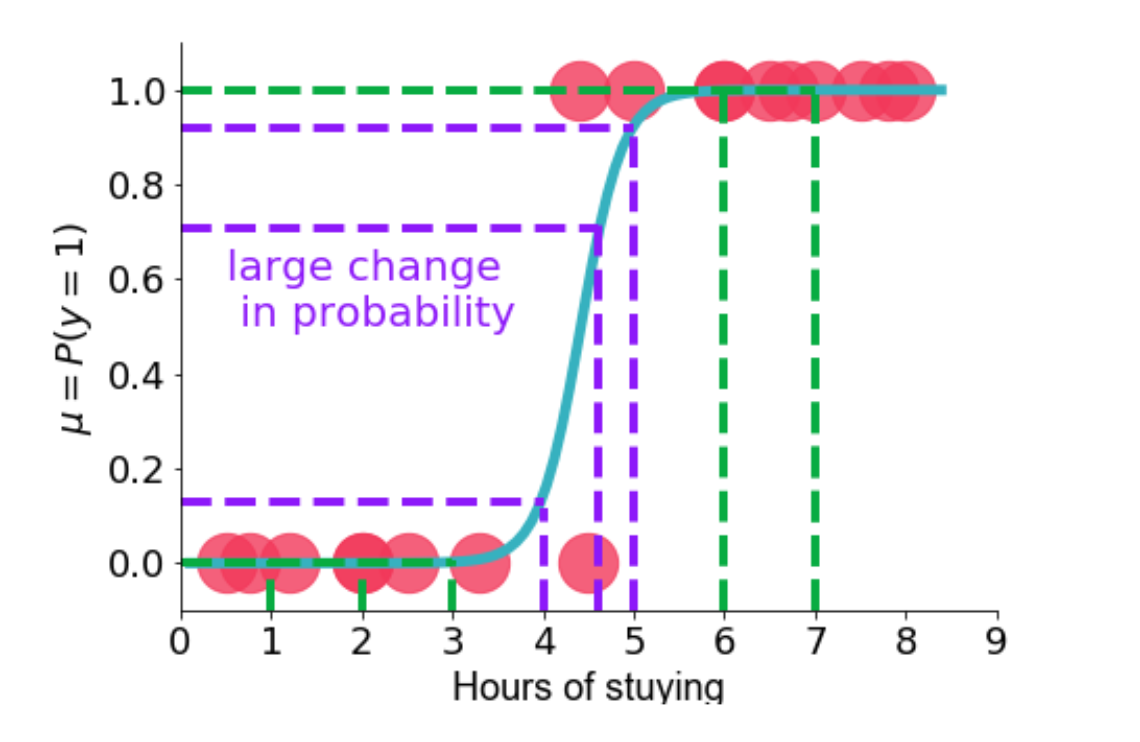

In [32]:
Image('probvlogfit.png', width=600, height=600)

We can see that the biggest increase in the estimated porbability is around the median value of x

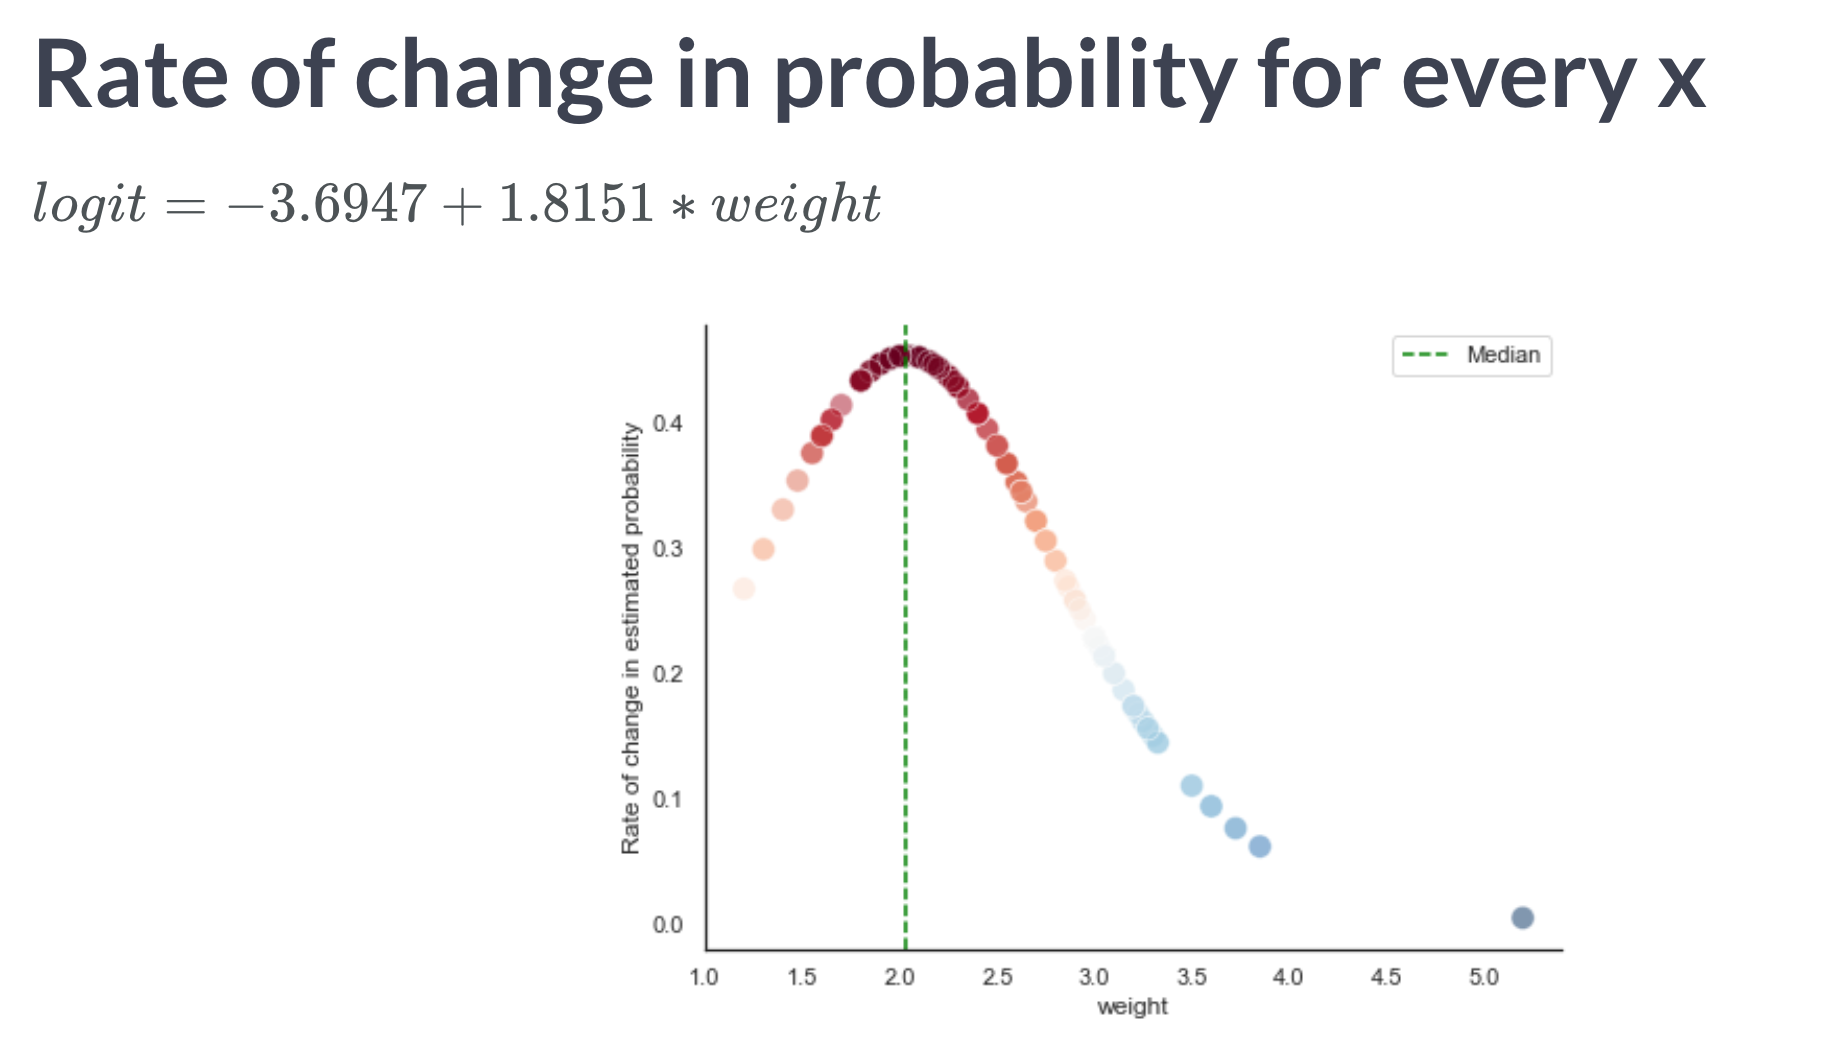

In [33]:
Image('rateofchangeforx.png', width=600, height=600)

In [43]:
import numpy as np

# Fit logistic regression model
model_GLM = glm(formula = 'switch ~ distance100',
                data = wells,
                family = sm.families.Binomial()).fit()

# Extract model coefficients
print('Model coefficients: \n', model_GLM.params)

# The exponential function is e^x where e is a mathematical constant called Euler's number, approximately 2.718281. 
# This value has a close mathematical relationship with pi 
# and the slope of the curve e^x is equal to its value at every point.
# Compute the multiplicative effect on the odds
print('\nOdds: \n', np.exp(model_GLM.params))

Model coefficients: 
 Intercept      0.610812
distance100   -0.629081
dtype: float64

Odds: 
 Intercept      1.841926
distance100    0.533082
dtype: float64


The odds of switching the well is 1/2 for a 1-unit (100m) increase in distance

For every one switch (household switches to the nearest safe well) there would be 2 households who would not switch to the nearest safe well

Expressed formulacially;

$$ log(\frac{p}{1-p}) = 0.611−0.629∗distance100 $$

With one-unit increase in distance100 the log odds decrease by -0.6219.

**Rate of change in probability**

Recall the formulas for the inverse-logit (probability) <br>*mu & p substituable here*

$$ \mu = \frac{exp(\beta_0 + \beta_1x_1)}{1 + exp(\beta_0 + \beta_1x_1)} $$

slop of the tangent line of the model fit at point x

$$ \beta * \mu(1-\mu) $$

In [46]:
# Define x at 1.5
x = 1.5

intercept, slope = model_GLM.params

# Compute and print the estimated probability
est_prob = np.exp(intercept + slope*x)/(1+np.exp(intercept + slope*x))
print('Estimated probability at x = 1.5: ', round(est_prob, 4))

# Compute the slope of the tangent line for parameter beta at x
slope_tan = slope * est_prob * (1 - est_prob)
print('The rate of change in probability: ', round(slope_tan,4))

Estimated probability at x = 1.5:  0.4176
The rate of change in probability:  -0.153


At the distance100 value of 1.5 the estimated probability is 0.419 with the rate of change in the estimated probability of negative 0.1514

This means that for every 100m increase in distance100 at the distance100 value of 1.5 the probability of well switch decreases by 15.14%

**Inerpreting model inference**

Maximum likelihood estimation (MLE) - given the parameter values, the point where the data has the highest likelihood

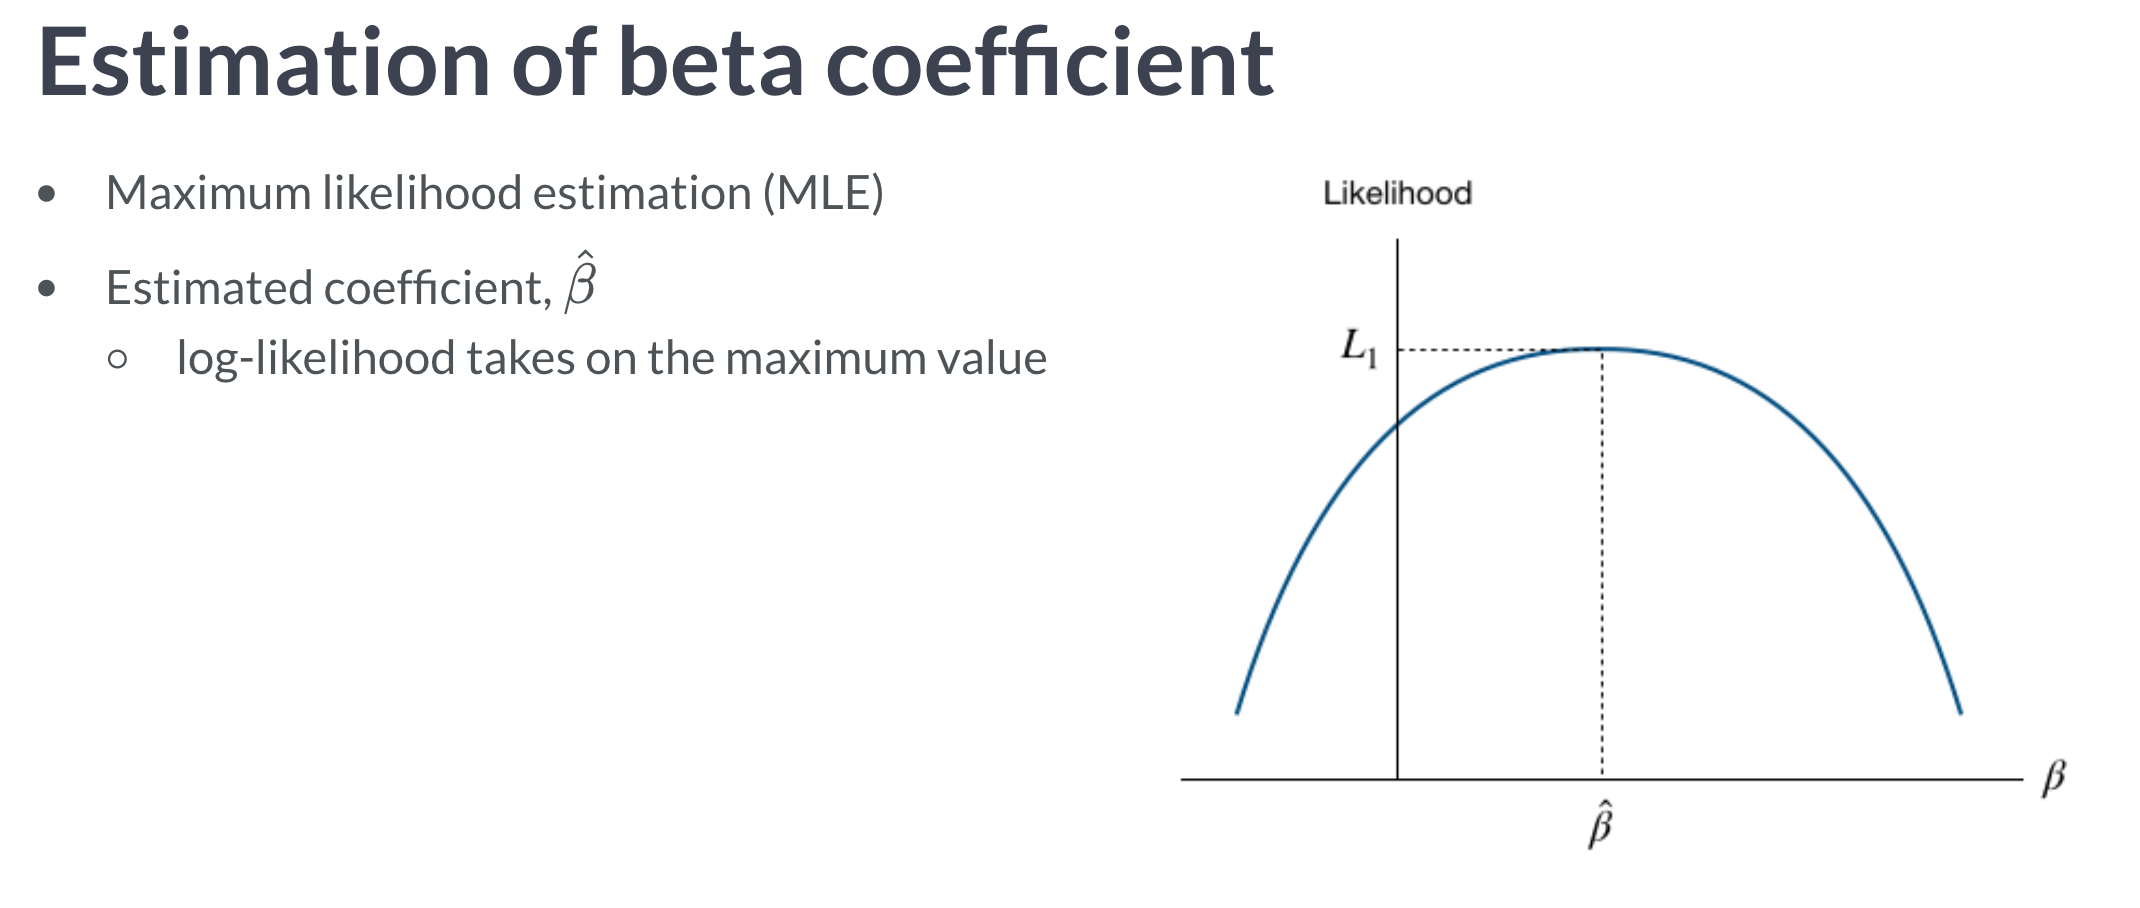

In [48]:
Image('mle.png', width=600, height=600)

Standard error is the standard deviation of a statistic

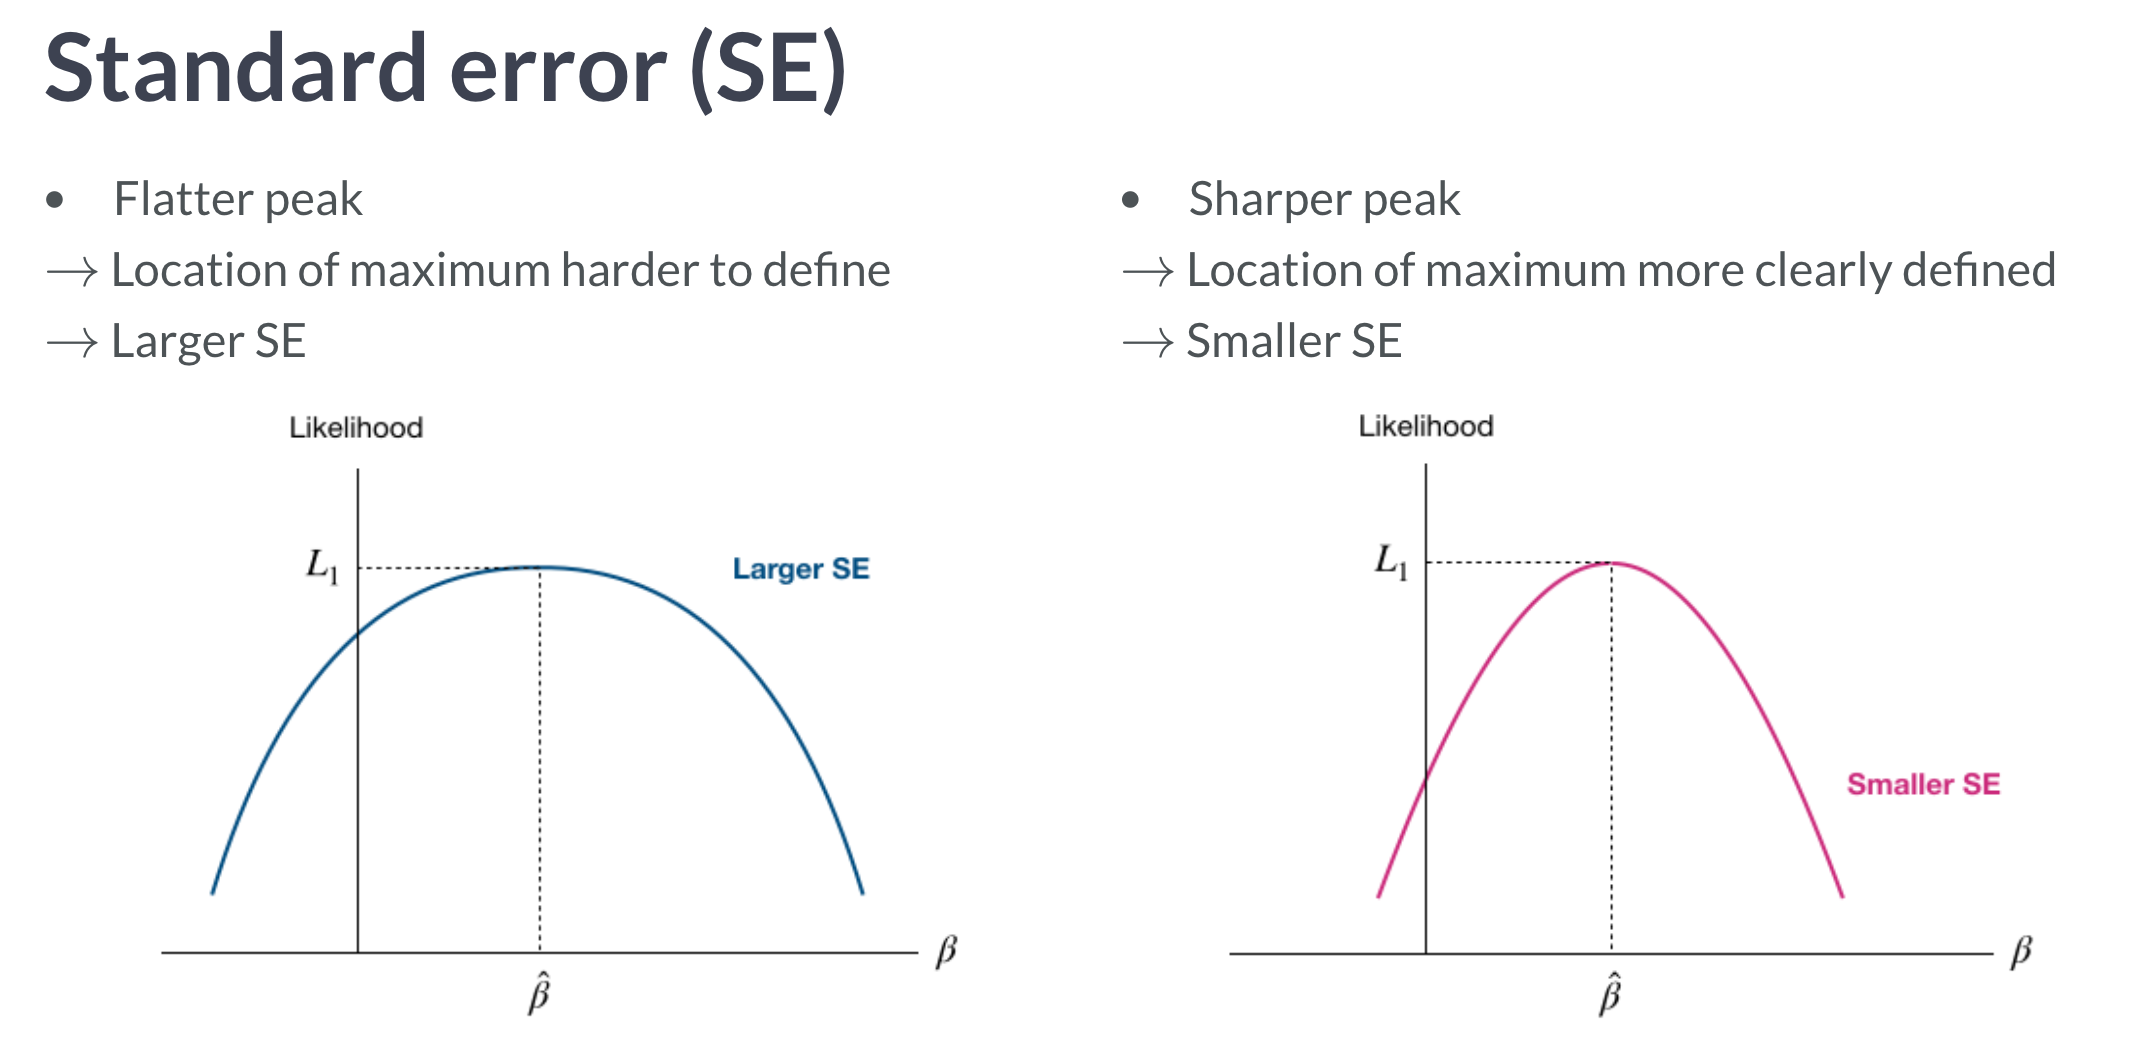

In [49]:
Image('standarderror.png', width=600, height=600)

To compute the standard error we take the square root of the variance for the variable

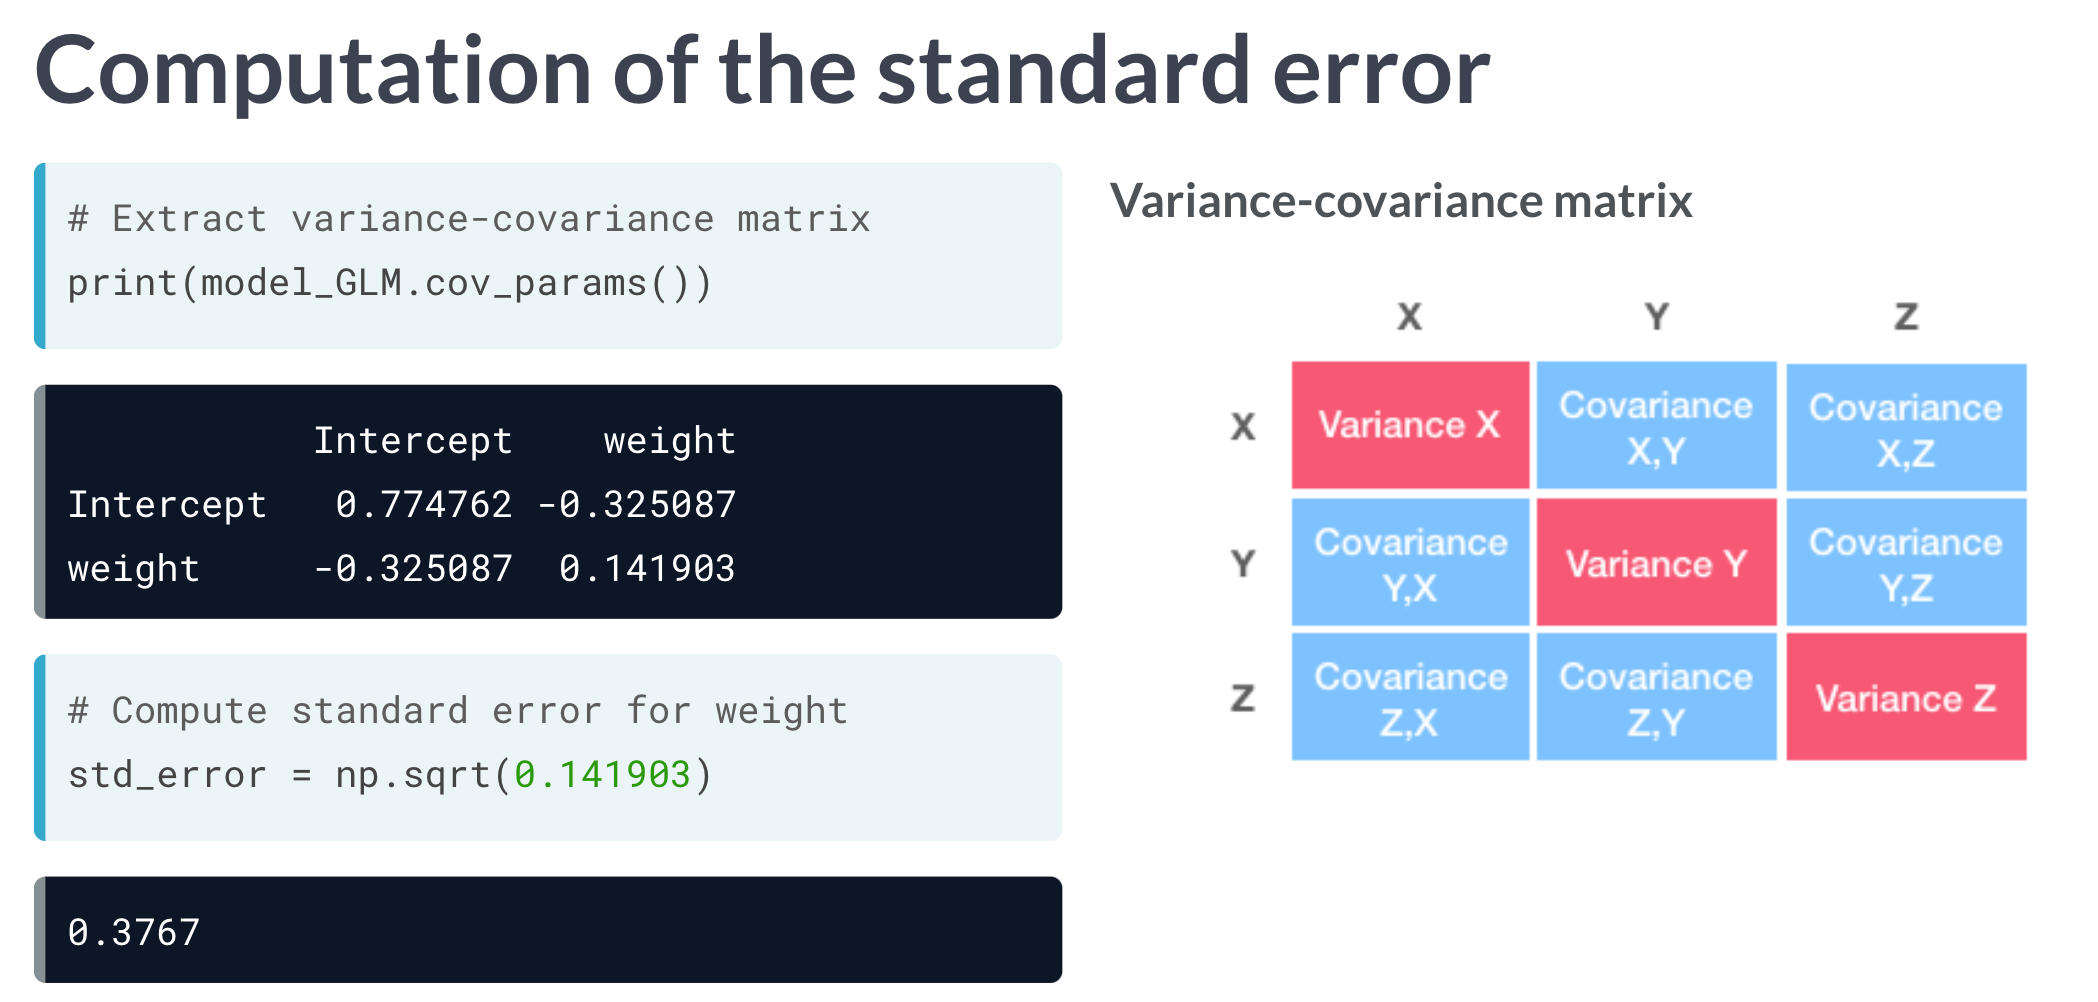

In [50]:
Image('calcstandarderror.png', width=600, height=600)

z statistic is the ratio of the estimated coefficient and its standard error

Above 2 is assumed significant

$$ z = \frac{\beta}{SE}$$

Also known as the Wald statistic

In [52]:
# statistical significance

# Fit logistic regression and save as crab_GLM
crab_GLM = glm('y ~ width', data = crab, family = sm.families.Binomial()).fit()

# Print model summary
print(crab_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.226
Date:                Wed, 15 Apr 2020   Deviance:                       194.45
Time:                        16:45:42   Pearson chi2:                     165.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3508      2.629     -4.698      0.0

In [55]:
# Extract coefficients
intercept, slope = crab_GLM.params

# Estimated covariance matrix: crab_cov
crab_cov = crab_GLM.cov_params()
print(f'Covariance matrix\n{crab_cov}')

# Compute standard error (SE): std_error
std_error = np.sqrt(crab_cov.loc['width', 'width'])
print('\nSE: ', round(std_error, 4))

# Compute Wald statistic
wald_stat = slope/std_error
print('\nWald statistic: ', round(wald_stat,4))

Covariance matrix
           Intercept     width
Intercept   6.910158 -0.266848
width      -0.266848  0.010350

SE:  0.1017

Wald statistic:  4.8875


**formulas for confidence intervals**

95% confidence intervals for the parameter $\beta$

$$ \hat{\beta} \pm 1.96 * SE $$

95% confidence intervals for odds

$$ exp(\hat{\beta} \pm 1.96 * SE) $$

*note; hat symbol represents an estimator; a rule that tells how to calculate an estimate based on the measurements contained in a sample*

In [61]:
# Extract and print confidence intervals
print(crab_GLM.conf_int())

# Compute confidence intervals for the odds
print(np.exp(crab_GLM.conf_int()))

print('\n\nWe can conclude that a 1 cm increase in width of a female crab\nhas at least 35% increase odds (from lower bound)\nand at most it doubles the odds (from upper bound)\nthat a satellite crab is present.')

                   0         1
Intercept -17.503010 -7.198625
width       0.297833  0.696629
                      0         1
Intercept  2.503452e-08  0.000748
width      1.346936e+00  2.006975


We can conclude that a 1 cm increase in width of a female crab
has at least 35% increase odds (from lower bound)
and at most it doubles the odds (from upper bound)
that a satellite crab is present.


**Predictions**

In the crab example

If we had a new crab, with a weight of 2.85

plugging that into the world, gives us a probability 0.814 that there is a satellite crab

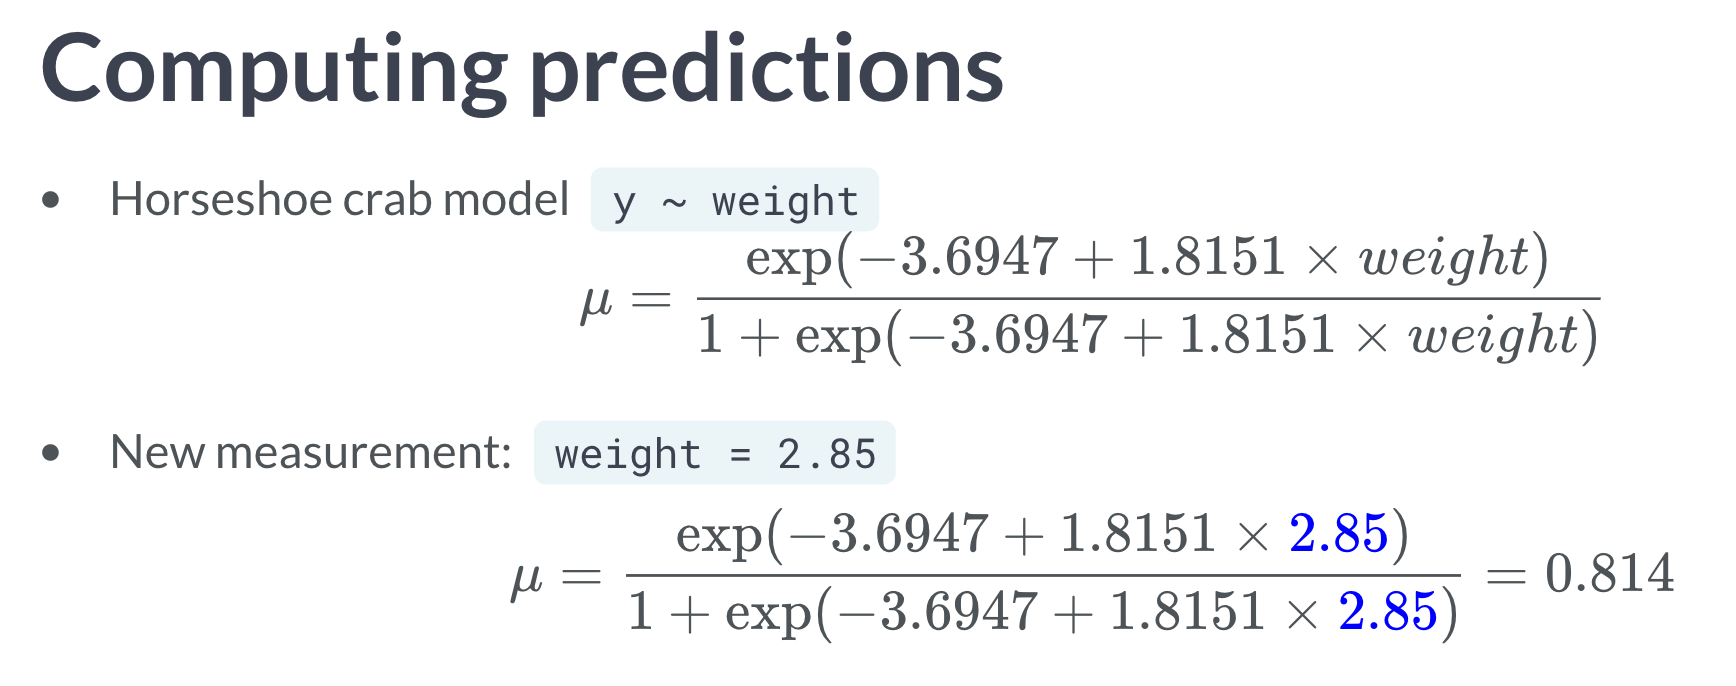

In [62]:
Image('crabexample.png', width=600, height=600)

We can specify the probability cut-off point (0.5 is the default)

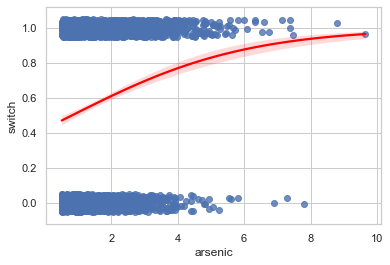

In [69]:
import seaborn as sns
sns.set(style="whitegrid")

# Plot distance and switch and add overlay with the logistic fit
sns.regplot(x = 'arsenic', y = 'switch', 
            y_jitter = 0.05,
            data = wells, 
            logistic = True,
            # ci = None
            line_kws = {'color': 'red'}
           )

# Display the plot
plt.show()

In [73]:
# # Compute predictions for the test sample wells_test and save as prediction
# prediction = wells_fit.predict(exog = wells_test)

# # Add prediction to the existing data frame wells_test and assign column name prediction
# wells_test['prediction'] = prediction

# # Examine the first 5 computed predictions
# print(wells_test[['switch', 'arsenic', 'prediction']].head())